## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [268]:
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings('ignore')

In [269]:
df_train=pd.read_csv("Train_Set_TVS.csv")

In [270]:
df_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [272]:
#Total there are 132440 observations and 33 columns all the datatypes are correct

In [ ]:
#Since dtype of Company_Rating should be objective it's in numeric

In [ ]:
df_train["Company_Rating"]=df_train["Company_Rating"].astype("object")

In [526]:
df_train.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,127108.000000,1.271080e+05,1.271080e+05,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000,127108.000000
mean,488962.315063,7.192511e+05,4.070507e+05,10798.399049,0.020402,3.278244,5.961560,2.158542,43.787165,12.086596,0.505632,0.505908,956.736413,3.311168,0.264956
std,58581.586052,2.875332e+05,2.611462e+05,1956.972941,0.011325,1.209613,5.151379,0.910664,11.972371,3.498583,0.250270,0.254882,793.387636,2.039526,0.441311
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,21.000000,3.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438100.500000,5.220390e+05,2.031280e+05,9384.457500,0.010800,2.000000,2.500000,2.000000,34.000000,10.000000,0.289000,0.283000,315.000000,2.000000,0.000000
50%,489028.500000,6.659960e+05,3.464954e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,43.000000,12.000000,0.505929,0.506181,770.000000,3.000000,0.000000
75%,539721.250000,8.545900e+05,5.526360e+05,12069.625000,0.030000,4.000000,7.700000,3.000000,54.000000,15.000000,0.747000,0.754000,1538.000000,5.000000,1.000000
max,590407.000000,1.999842e+06,1.498720e+06,19998.080000,0.041400,7.000000,29.900000,9.000000,69.000000,22.000000,0.947000,0.947000,3382.000000,9.000000,1.000000


In [527]:
#There are some null values in the dataset and all are having different range of data and 
#median and mean shows most of them are right skewed

In [529]:
df_train.describe(include="object")

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag
count,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108,127108.0,127108,127108,127108
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,3.0,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,2.0,North,Yes,Yes
freq,87071,74422,114285,89444,103116,67256,90525,93647,83631,112794,93757,22229,101583,115099,97906.0,51242,117060,104051


In [530]:
#There are some null values in the dataset almost same number of unique values

In [525]:
df_train.corr()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,1.000000,0.000850,0.001383,0.002504,0.002109,0.002362,-0.008721,0.000255,0.000084,0.000138,0.003526,0.003968,-0.002329,0.002989,-0.000582
Compensation,0.000850,1.000000,0.335740,0.279296,0.005175,-0.032639,0.046937,0.032233,-0.068649,0.078329,-0.025047,-0.023609,0.048783,0.036723,-0.001790
Loan_amt,0.001383,0.335740,1.000000,0.467486,0.005565,0.002799,0.084257,0.054795,0.051552,0.040310,0.003620,0.003770,0.066298,-0.022596,-0.006839
Annuity_amt,0.002504,0.279296,0.467486,1.000000,0.002709,-0.011771,0.040537,0.049111,-0.007754,0.028221,0.001670,0.000518,0.036627,-0.004809,-0.002163
density_Ind,0.002109,0.005175,0.005565,0.002709,1.000000,0.000360,-0.000706,-0.004263,0.000147,0.003705,-0.002960,-0.004078,-0.004408,-0.001695,0.001777
Home_Appliances,0.002362,-0.032639,0.002799,-0.011771,0.000360,1.000000,0.016419,-0.585396,0.309767,0.000096,0.008005,0.008870,-0.005217,0.026382,-0.002427
Experience,-0.008721,0.046937,0.084257,0.040537,-0.000706,0.016419,1.000000,0.016407,0.163971,-0.004574,0.029441,0.031281,0.127065,-0.002223,-0.017432
Dependents,0.000255,0.032233,0.054795,0.049111,-0.004263,-0.585396,0.016407,1.000000,-0.262471,-0.011885,-0.003839,-0.003612,0.026701,-0.014053,0.001030
Age,0.000084,-0.068649,0.051552,-0.007754,0.000147,0.309767,0.163971,-0.262471,1.000000,-0.080211,0.057569,0.059345,0.071891,0.049237,-0.022188
hour_Process,0.000138,0.078329,0.040310,0.028221,0.003705,0.000096,-0.004574,-0.011885,-0.080211,1.000000,-0.011303,-0.010704,0.009150,-0.020163,-0.007946


In [531]:
#Above data shows that less corelation between values

#### Checking for null values

In [275]:
percent_null=(df_train.isnull().sum()/len(df_train))*100
percent_null[percent_null>0]

Compensation        4.713078
Vehicle_Status      6.874056
Annuity_amt         3.481577
density_Ind         4.089399
Job_Type            7.737844
Prop_List           1.483691
Home_Appliances     8.278466
Credit_Inq          2.031108
Experience         16.494262
Income_Alt          5.800362
Company_Rating      8.857596
c1_rated           13.223346
c2_rated           10.058140
Contact_age         6.155995
dtype: float64

In [276]:
# Null value treatment for Compensation

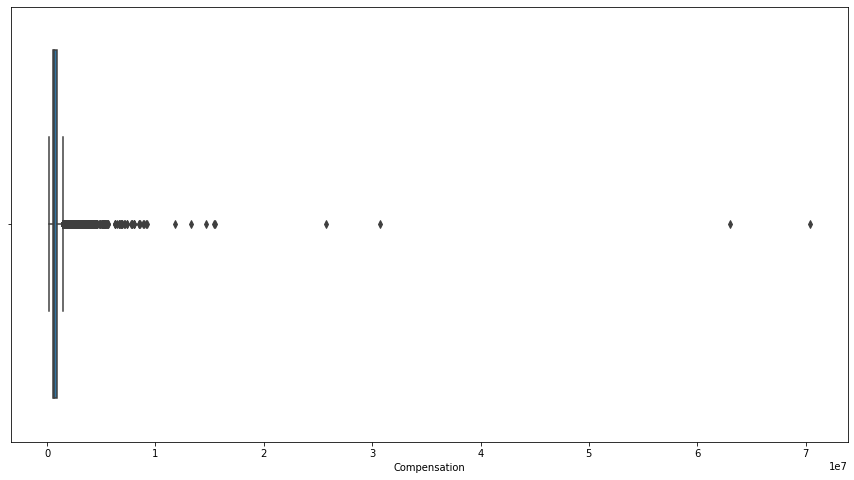

In [277]:
sns.boxplot(df_train["Compensation"])
plt.show()

In [278]:
#Since in Compensation outliers are there and rightly skewed the null values are replacing with median

In [279]:
df_train["Compensation"].replace(np.nan, df_train["Compensation"].median(), inplace=True)

In [280]:
# Null value treatment for Vehicle_Status
#It is categorical variable replacing with mode

In [281]:
df_train["Vehicle_Status"].value_counts()

N    81370
Y    41966
Name: Vehicle_Status, dtype: int64

In [282]:
df_train["Vehicle_Status"].replace(np.nan, df_train["Vehicle_Status"].mode()[0], inplace=True)

In [283]:
# Null value treatment for Annuity_amt

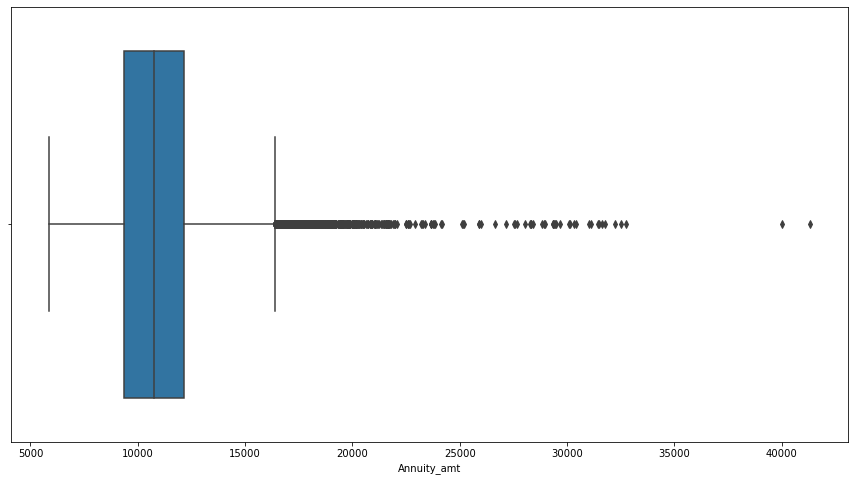

In [284]:
sns.boxplot(df_train["Annuity_amt"])
plt.show()

In [285]:
#Since in Annuity_amt outliers are there and rightly skewed the null values are replacing with median

In [286]:
df_train["Annuity_amt"].replace(np.nan, df_train["Annuity_amt"].median(), inplace=True)

In [287]:
# Null value treatment for density_Ind

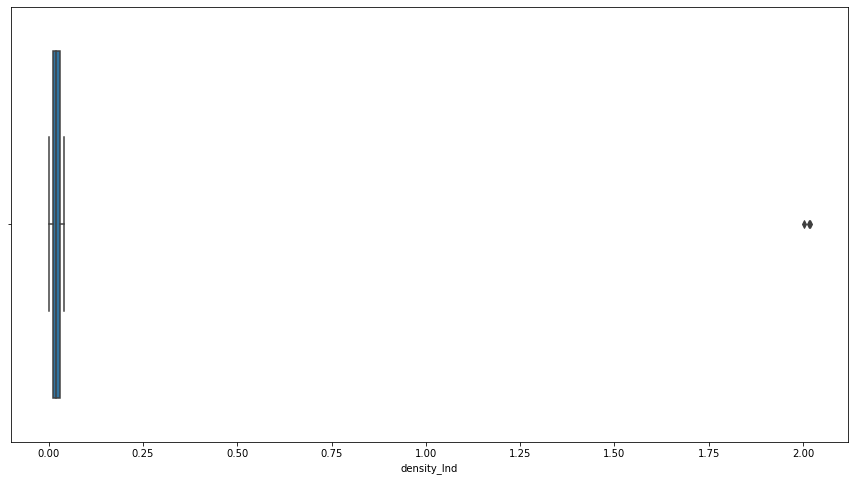

In [288]:
sns.boxplot(df_train["density_Ind"])
plt.show()

In [289]:
#Since in density_Ind outliers are there and rightly skewed the null values are replacing with median

In [290]:
df_train["density_Ind"].replace(np.nan, df_train["density_Ind"].median(), inplace=True)

In [291]:
# Null value treatment for Job_Type 
#Since it's a categorical variable replcaing with mode

In [292]:
df_train["Job_Type"].value_counts()

IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64

In [293]:
df_train["Job_Type"].replace(np.nan, df_train["Job_Type"].mode()[0], inplace=True)

In [294]:
# Null value treatment for Prop_List 
#Since it's a categorical variable replcaing with mode

In [295]:
df_train["Prop_List"].value_counts()

One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64

In [296]:
df_train["Prop_List"].replace(np.nan, df_train["Prop_List"].mode()[0], inplace=True)

In [297]:
# Null value treatment for Home_Appliances 

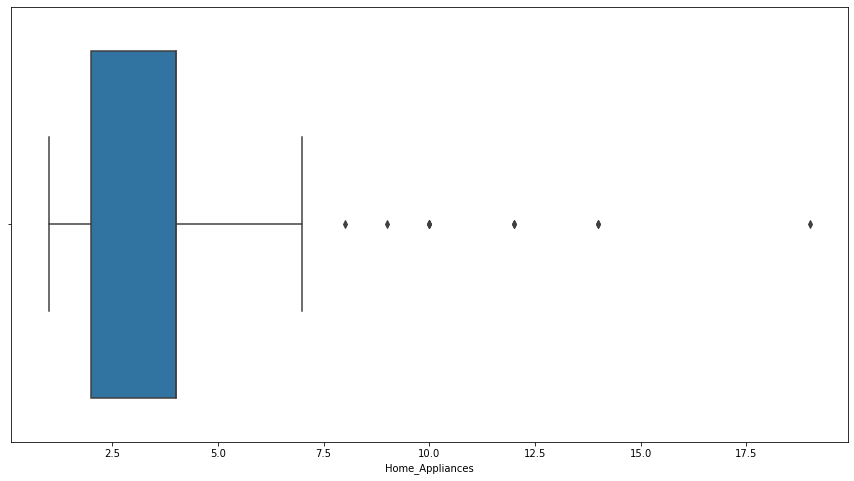

In [298]:
sns.boxplot(df_train["Home_Appliances"])
plt.show()

In [299]:
#Since in Home_Appliances outliers are there and rightly skewed the null values are replacing with median

In [300]:
df_train["Home_Appliances"].replace(np.nan, df_train["Home_Appliances"].median(), inplace=True)

In [301]:
# Null value treatment for Credit_Inq 
#Since it's a categorical variable replcaing with mode

In [302]:
df_train["Credit_Inq"].value_counts()

1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

In [303]:
df_train["Credit_Inq"].replace(np.nan, df_train["Credit_Inq"].mode()[0], inplace=True)

In [304]:
# Null value treatment for Experience 

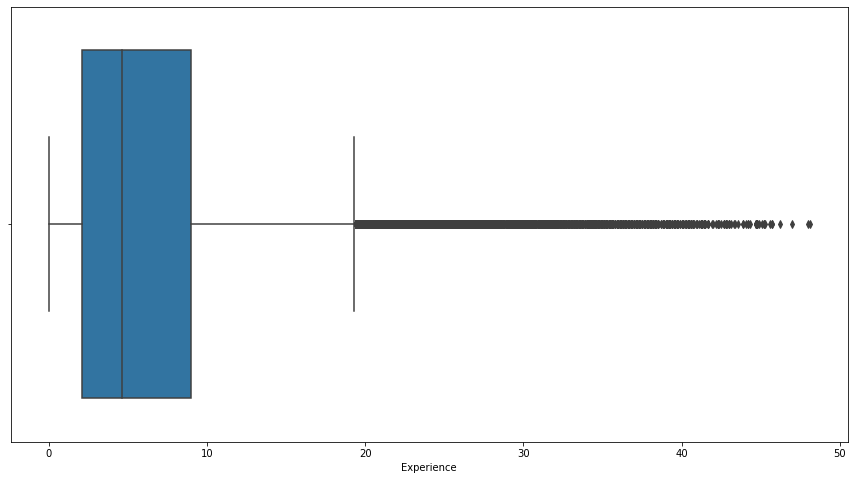

In [305]:
sns.boxplot(df_train["Experience"])
plt.show()

In [306]:
#Since in Experience outliers are there and rightly skewed the null values are replacing with median

In [307]:
df_train["Experience"].replace(np.nan, df_train["Experience"].median(), inplace=True)

In [308]:
# Null value treatment for Income_Alt 
#Since it's a categorical variable replcaing with mode

In [309]:
df_train["Income_Alt"].value_counts()

Not_Specified    89848
Y                34910
Name: Income_Alt, dtype: int64

In [310]:
df_train["Income_Alt"].replace(np.nan, df_train["Income_Alt"].mode()[0], inplace=True)

In [311]:
# Null value treatment for Company_Rating 
#Since it's a categorical variable replcaing with mode

In [312]:
df_train["Company_Rating"].value_counts()

2.0    89965
3.0    17216
1.0    13528
Name: Company_Rating, dtype: int64

In [313]:
df_train["Company_Rating"].replace(np.nan, df_train["Company_Rating"].mode()[0], inplace=True)

In [314]:
# Null value treatment for c1_rated 

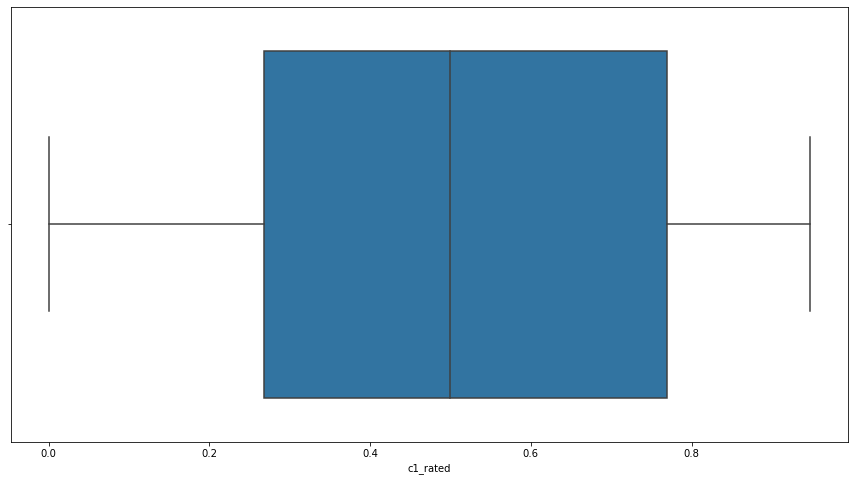

In [315]:
sns.boxplot(df_train["c1_rated"])
plt.show()

In [316]:
#Since in c1_rated outliers are not there and it's almost symmetric will replace null values with mean

In [317]:
df_train["c1_rated"].replace(np.nan, df_train["c1_rated"].mean(), inplace=True)

In [318]:
# Null value treatment for c2_rated 

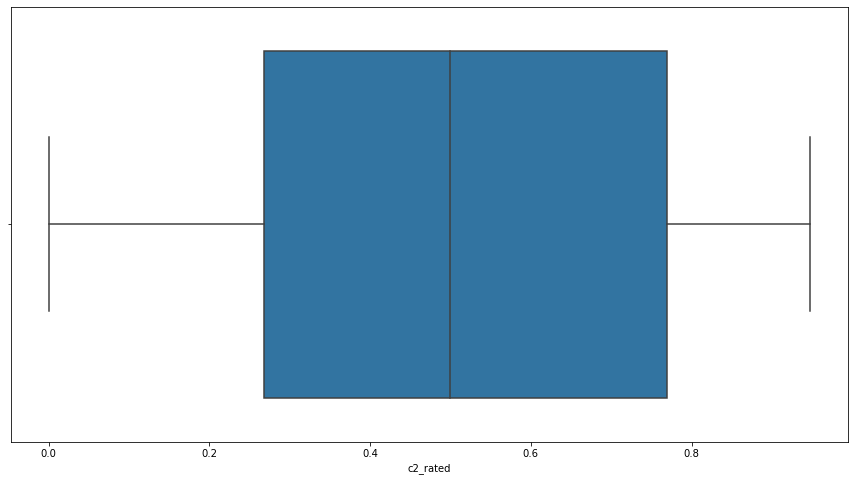

In [319]:
sns.boxplot(df_train["c2_rated"])
plt.show()

In [320]:
#Since in c2_rated outliers are not there and it's almost symmetric will replace null values with mean

In [321]:
df_train["c2_rated"].replace(np.nan, df_train["c2_rated"].mean(), inplace=True)

In [322]:
# Null value treatment for c1_rated 

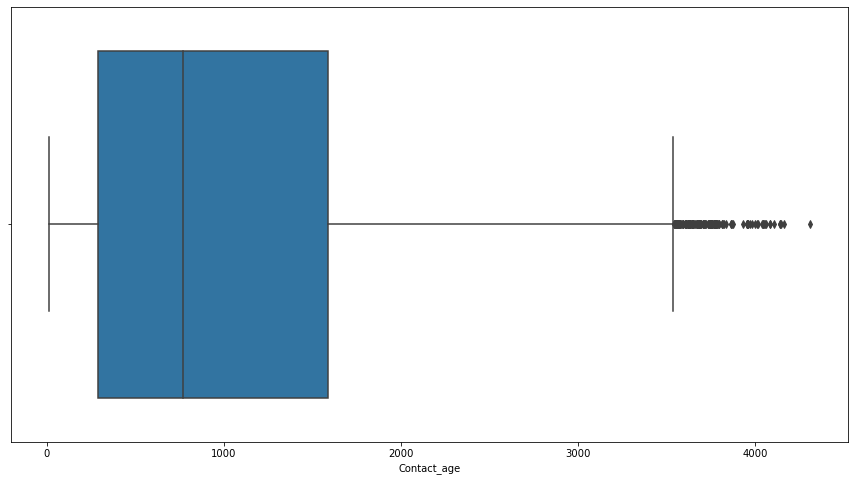

In [323]:
sns.boxplot(df_train["Contact_age"])
plt.show()

In [324]:
#Since in Contact_age outliers are there and rightly skewed the null values are replacing with median

In [325]:
df_train["Contact_age"].replace(np.nan, df_train["Contact_age"].median(), inplace=True)

In [326]:
df_train.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

### Outlier treatment

In [327]:
df_num=df_train.select_dtypes(np.number)
df_cat=df_train.select_dtypes("object")

In [328]:
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,4.0,0.9,3.0,2.0,46.0,10.0,0.077000,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184000,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,4.6,2.0,3.0,57.0,5.0,0.538000,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,0.505929,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,0.505929,0.200,2339.0,6.0,0.0


In [329]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes


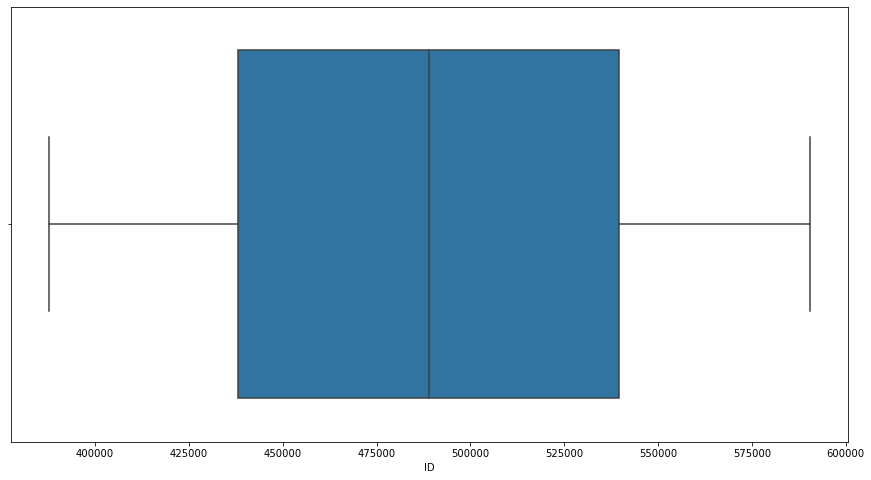

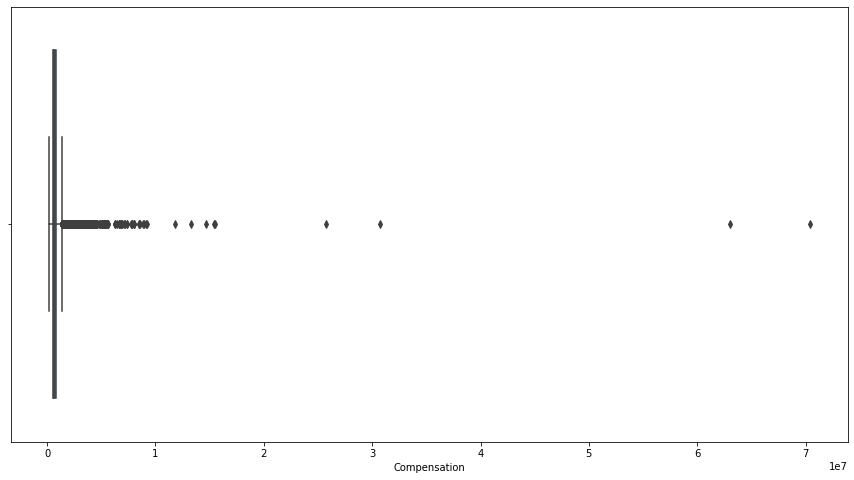

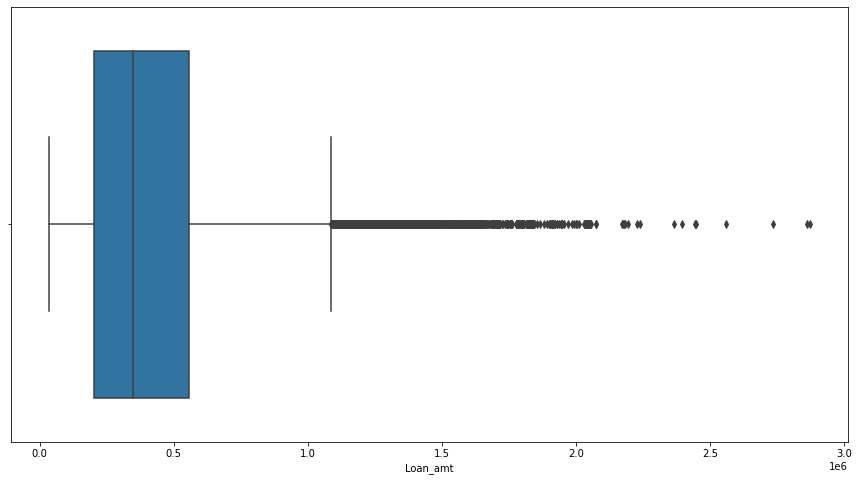

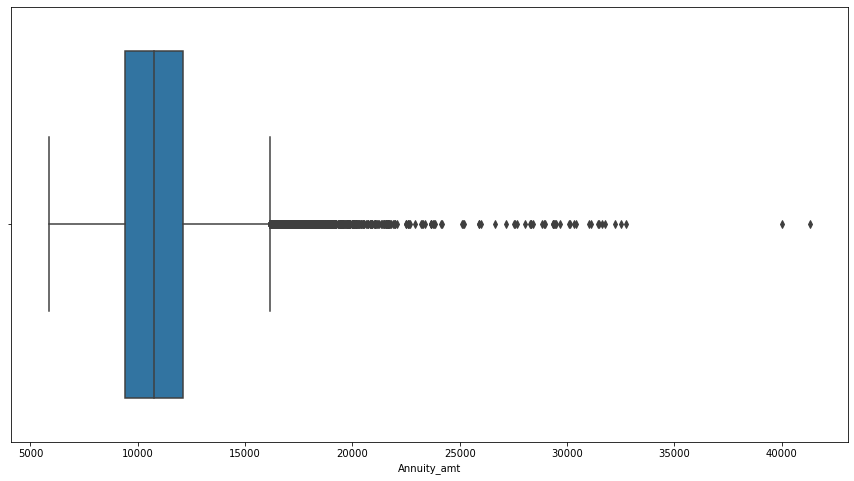

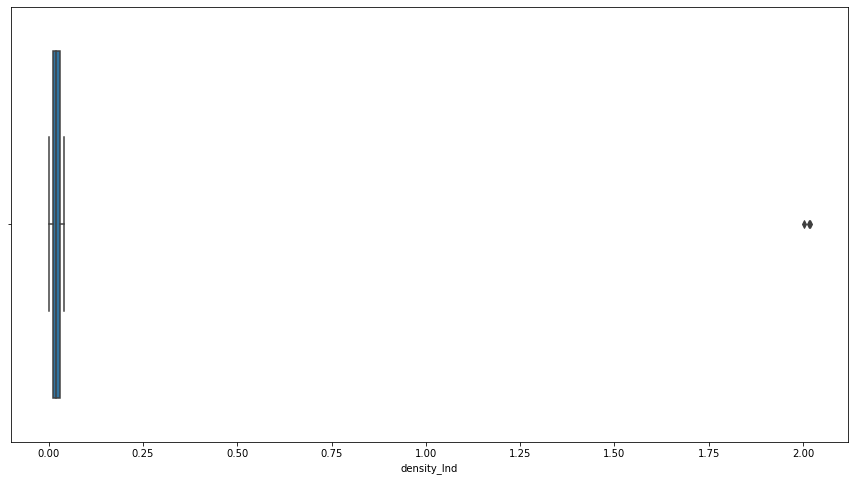

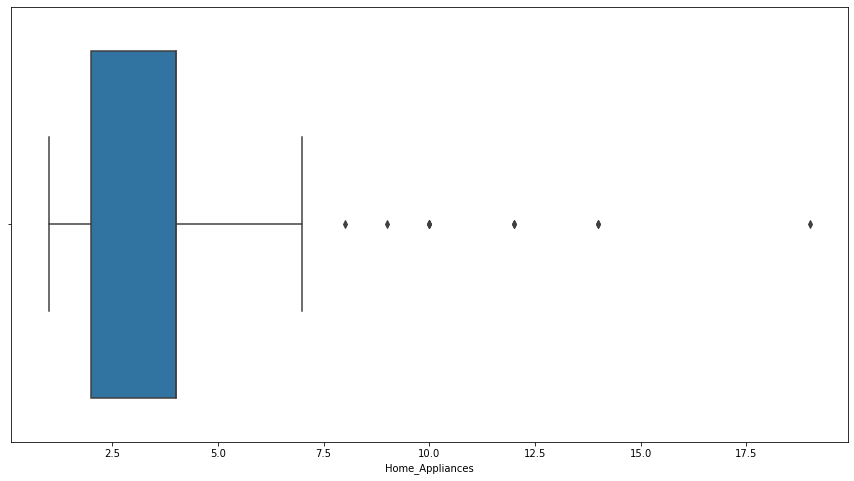

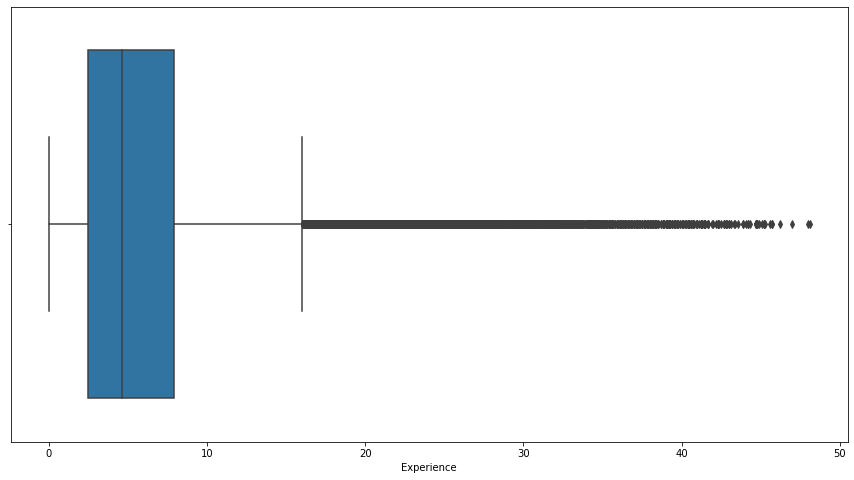

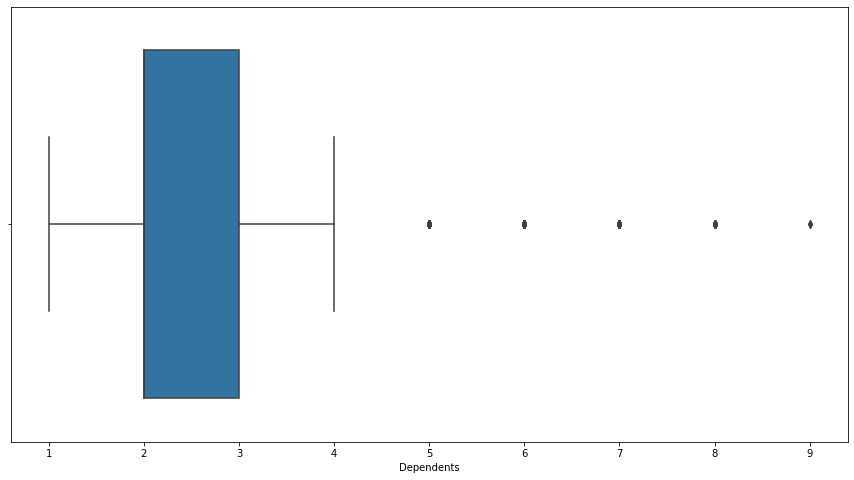

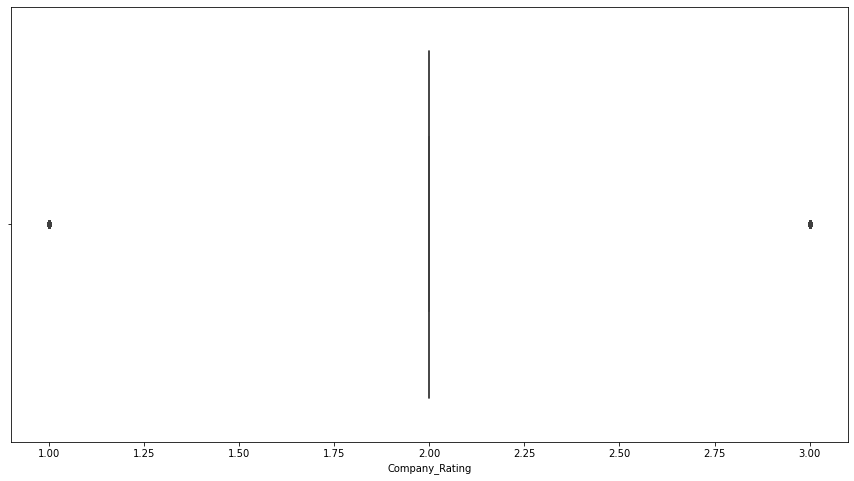

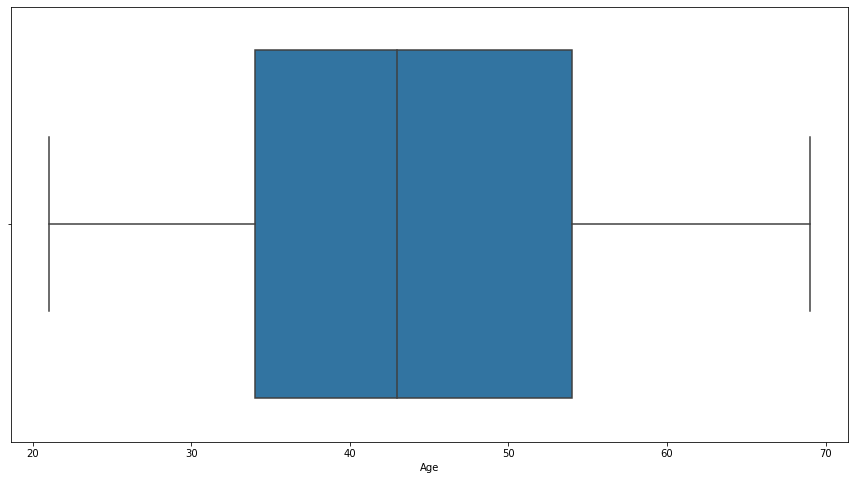

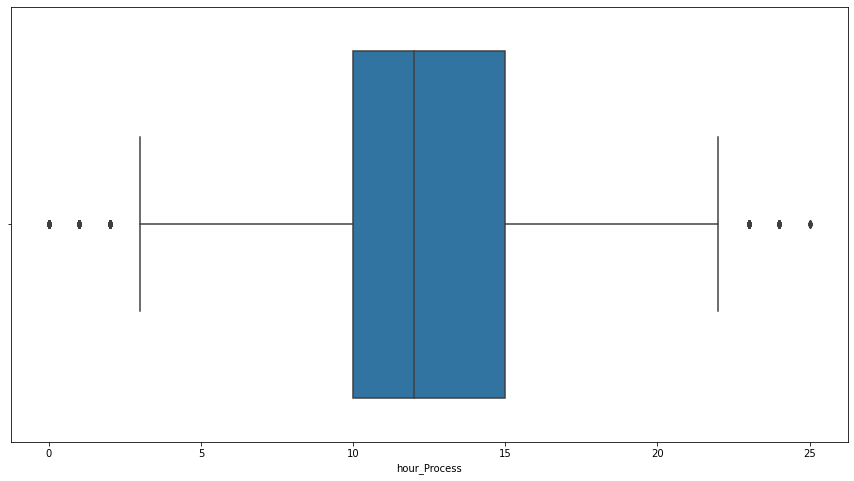

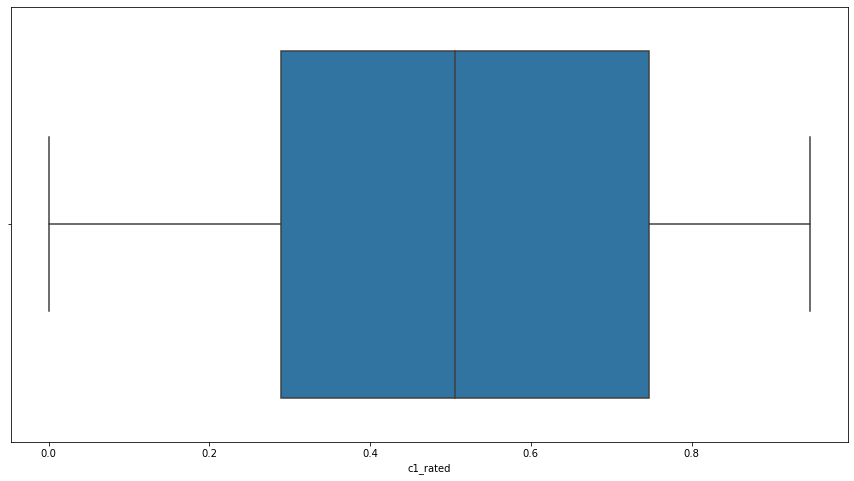

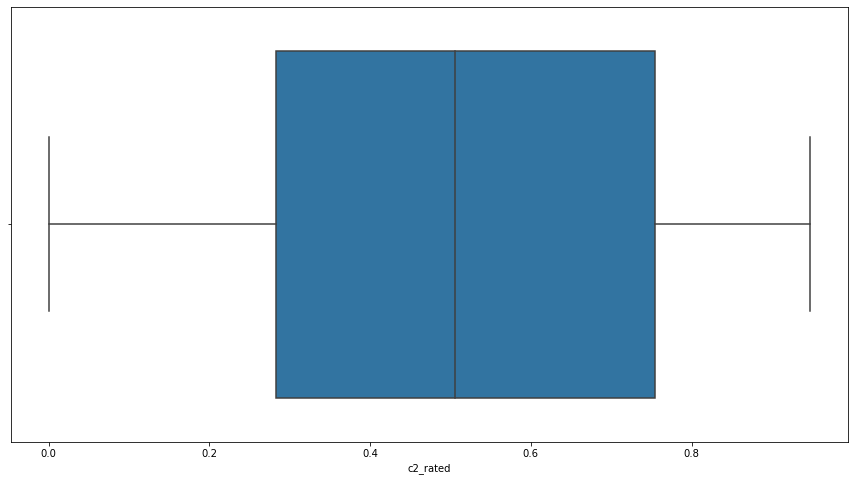

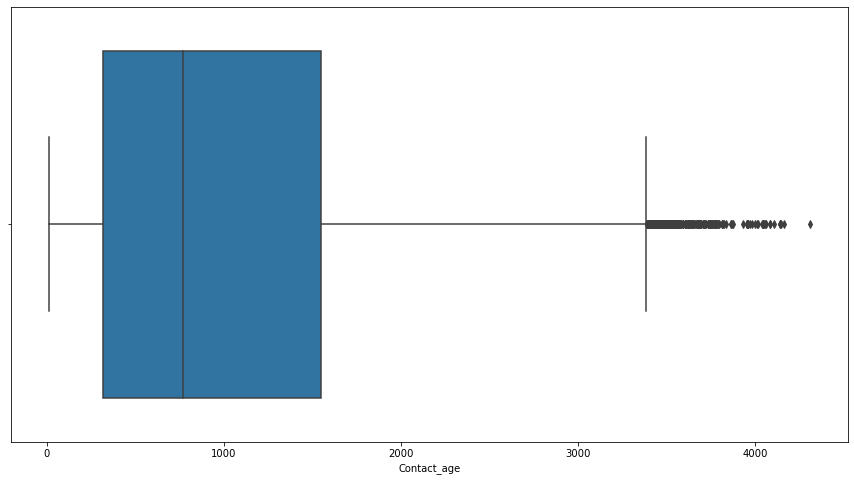

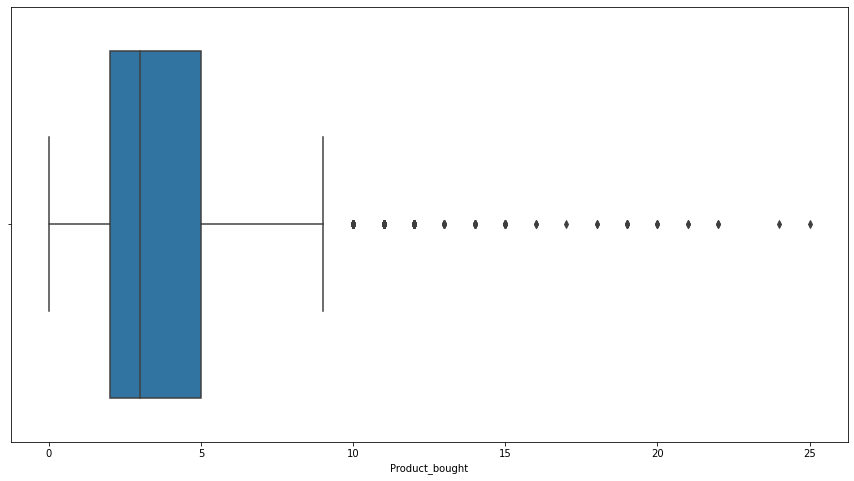

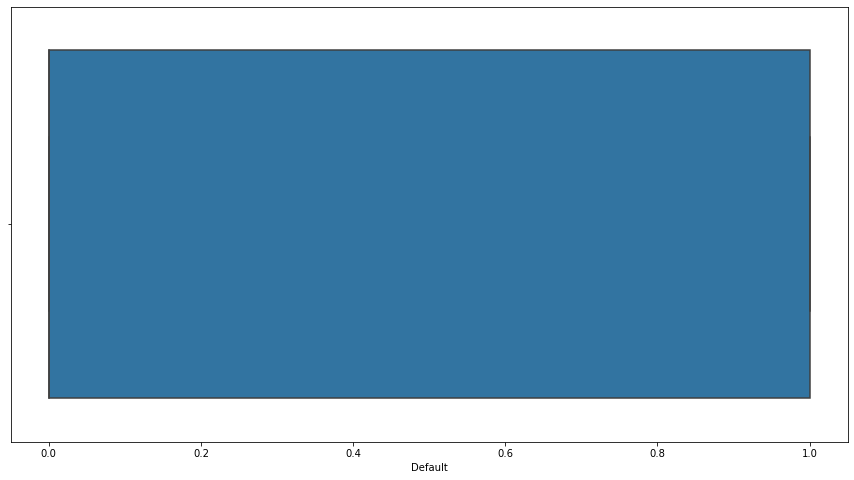

In [330]:
plt.rcParams["figure.figsize"]=[15,8]
for var in df_num:
    sns.boxplot(df_train[var])
    plt.show()

In [331]:
#Since most of the variables are having outliers and the outliers are not distributed equally on both sides and outliers are 
#not properlly distributed
#So removing only the extreme outlier using quantile method

In [332]:
#Outlier treatment for compensation

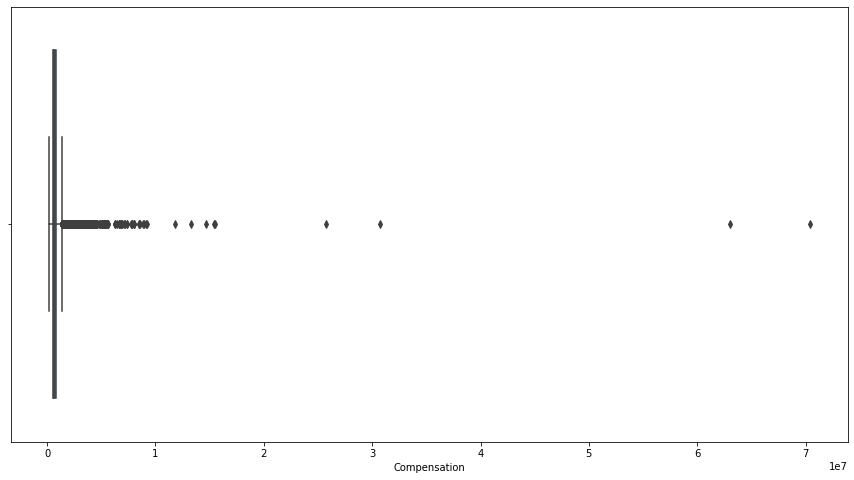

In [333]:
sns.boxplot(df_train["Compensation"])
plt.show()

In [334]:
df_train["Compensation"].quantile(0.99)

1917425.9199999962

In [335]:
df_train[df_train["Compensation"]>2000000].shape

(1104, 33)

In [336]:
#Removing the values greater than 2000000 by considering quantile method and by visualizing the boxplot

In [337]:
df_train=df_train[df_train["Compensation"]<2000000]

In [338]:
#Outlier treatment for Loan_amt

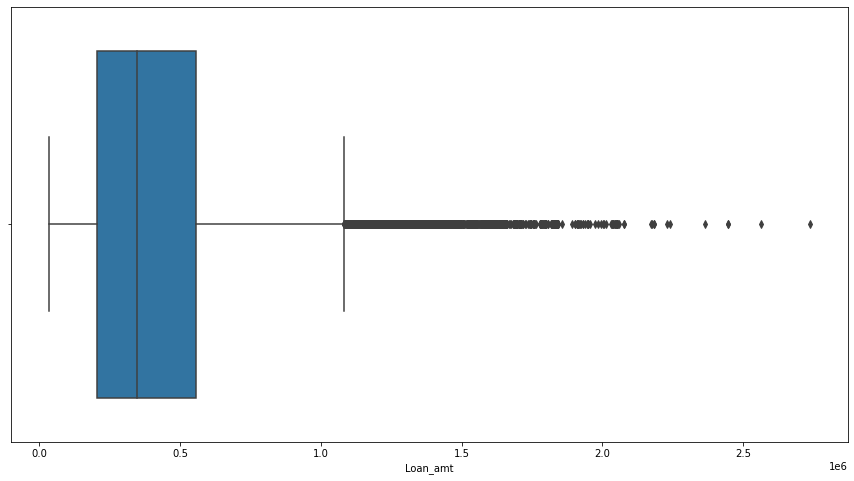

In [339]:
sns.boxplot(df_train["Loan_amt"])
plt.show()

In [340]:
df_train["Loan_amt"].quantile(0.99)

1279969.9999999998

In [341]:
df_train[df_train["Loan_amt"]>1500000].shape

(456, 33)

In [342]:
#Removing the values greater than 1500000 by considering quantile method and by visualizing the boxplot

In [343]:
df_train=df_train[df_train["Loan_amt"]<1500000]

In [344]:
#Outlier treatment for Annuity_amt

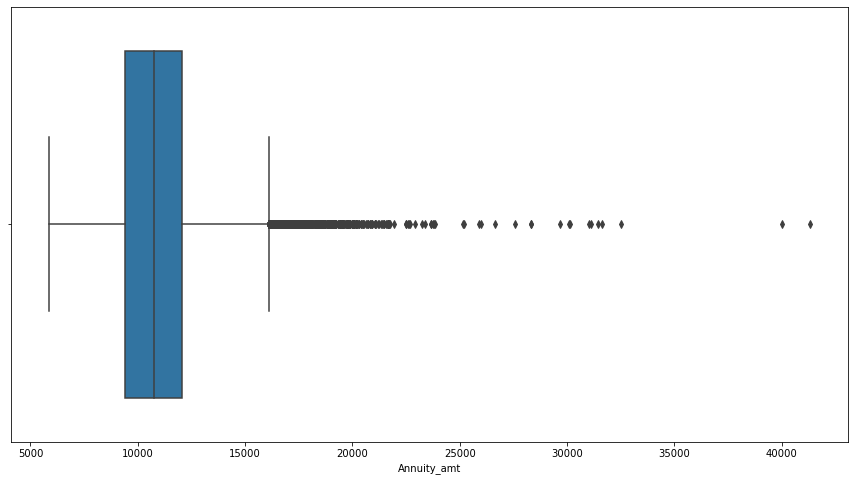

In [345]:
sns.boxplot(df_train["Annuity_amt"])
plt.show()

In [346]:
df_train["Annuity_amt"].quantile(0.99)

15857.2726

In [347]:
df_train[df_train["Annuity_amt"]>20000].shape

(83, 33)

In [348]:
#Removing the values greater than 20000 by considering quantile method and by visualizing the boxplot

In [349]:
df_train=df_train[df_train["Annuity_amt"]<20000]

In [350]:
#Outlier treatment for density_Ind

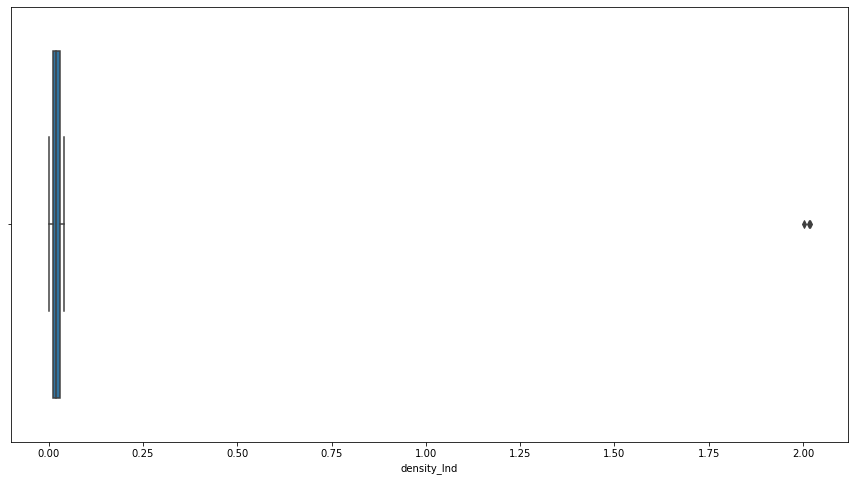

In [351]:
sns.boxplot(df_train["density_Ind"])
plt.show()

In [352]:
df_train["density_Ind"].quantile(0.99)

0.04

In [353]:
df_train[df_train["density_Ind"]>0.25].shape

(3, 33)

In [354]:
#Removing the values greater than 0.25 by considering quantile method and by visualizing the boxplot

In [355]:
df_train=df_train[df_train["density_Ind"]<0.25]

In [356]:
#Outlier treatment for Home_Appliances

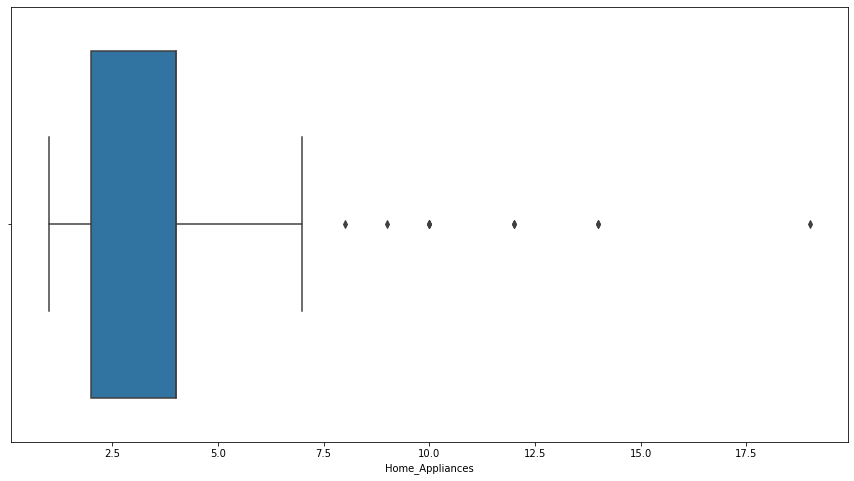

In [357]:
sns.boxplot(df_train["Home_Appliances"])
plt.show()

In [358]:
df_train["Home_Appliances"].quantile(0.99)

4.0

In [359]:
df_train[df_train["Home_Appliances"]>7.5].shape

(10, 33)

In [360]:
#Removing the values greater than 7.5 by considering quantile method and by visualizing the boxplot

In [361]:
df_train=df_train[df_train["Home_Appliances"]<7.5]

In [362]:
#Outlier treatment for Experience

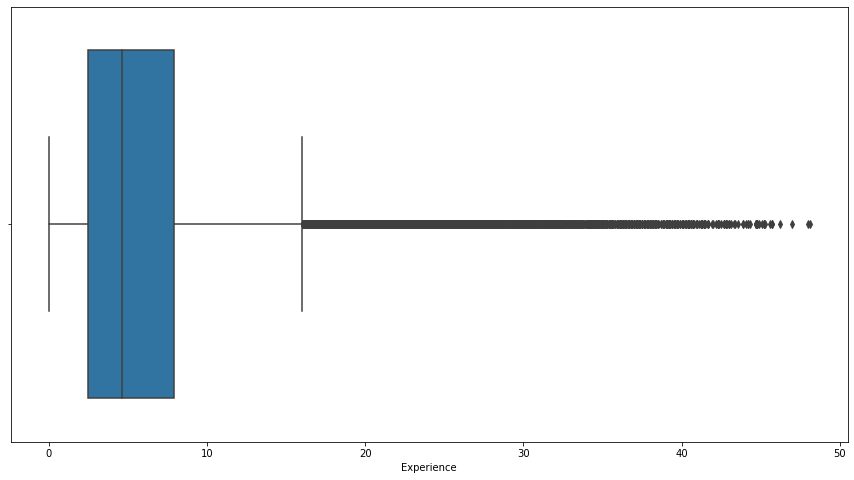

In [363]:
sns.boxplot(df_train["Experience"])
plt.show()

In [364]:
df_train["Experience"].quantile(0.99)

29.9

In [365]:
df_train[df_train["Experience"]>30].shape

(1270, 33)

In [366]:
#Removing the values greater than 30 by considering quantile method and by visualizing the boxplot

In [367]:
df_train=df_train[df_train["Experience"]<30]

In [368]:
#Outlier treatment for hour_Process

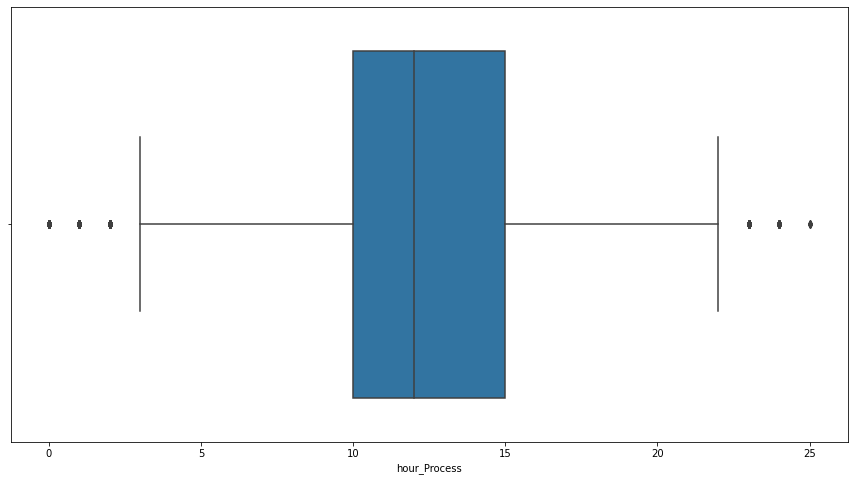

In [369]:
sns.boxplot(df_train["hour_Process"])
plt.show()

In [370]:
df_train["hour_Process"].quantile(0.99)

20.0

In [371]:
df_train["hour_Process"].quantile(0.01)

4.0

In [372]:
Q1 = df_train["hour_Process"].quantile(0.25)
Q3 = df_train["hour_Process"].quantile(0.75)
IQR = Q3 - Q1

In [373]:
(Q3 + 1.5 * IQR)

22.5

In [374]:
(Q1 - 1.5 * IQR)

2.5

In [375]:
df_train[df_train["hour_Process"]>22.5].shape

(68, 33)

In [376]:
df_train[df_train["hour_Process"]<2.5].shape

(525, 33)

In [377]:
#Removing the values greater than 22.5 and less than 2.5 by considering quantile method and by visualizing the boxplot

In [378]:
df_train=df_train[df_train["hour_Process"]<22.5]

In [379]:
df_train=df_train[df_train["hour_Process"]>2.5]

In [380]:
#Outlier treatment for Contact_age

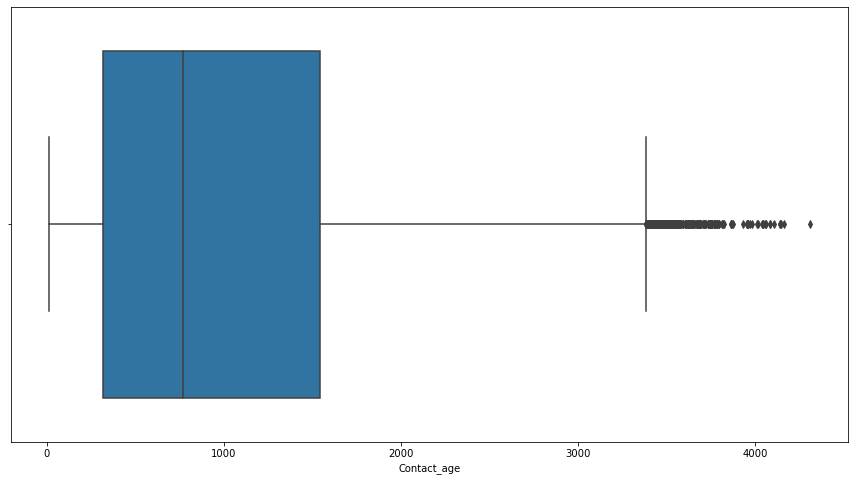

In [381]:
sns.boxplot(df_train["Contact_age"])
plt.show()

In [382]:
df_train["Contact_age"].quantile(0.99)

3140.0

In [383]:
df_train[df_train["Contact_age"]>3500].shape

(183, 33)

In [384]:
Q1 = df_train["Contact_age"].quantile(0.25)
Q3 = df_train["Contact_age"].quantile(0.75)
IQR = Q3 - Q1

In [385]:
(Q3 + 1.5 * IQR)

3383.0

In [386]:
df_train[df_train["Contact_age"]>3383.0].shape

(351, 33)

In [387]:
#Removing the values greater than 3383 by considering quantile method and by visualizing the boxplot

In [388]:
df_train=df_train[df_train["Contact_age"]<3383]

In [389]:
#Outlier treatment for Product_bought

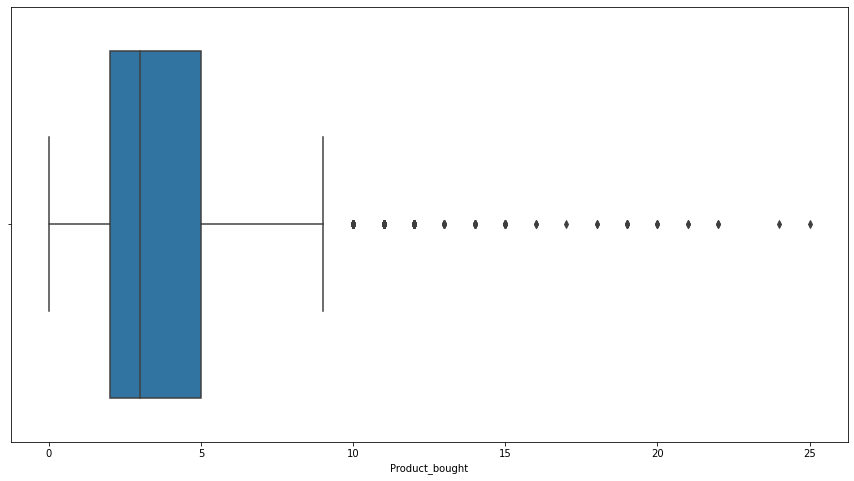

In [390]:
sns.boxplot(df_train["Product_bought"])
plt.show()

In [391]:
df_train["Product_bought"].quantile(0.99)

10.0

In [392]:
df_train[df_train["Product_bought"]>10].shape

(598, 33)

In [393]:
#Removing the values greater than 10 by considering quantile method and by visualizing the boxplot

In [394]:
df_train=df_train[df_train["Product_bought"]<10]

In [395]:
#Checking for distribution after outliers treatment

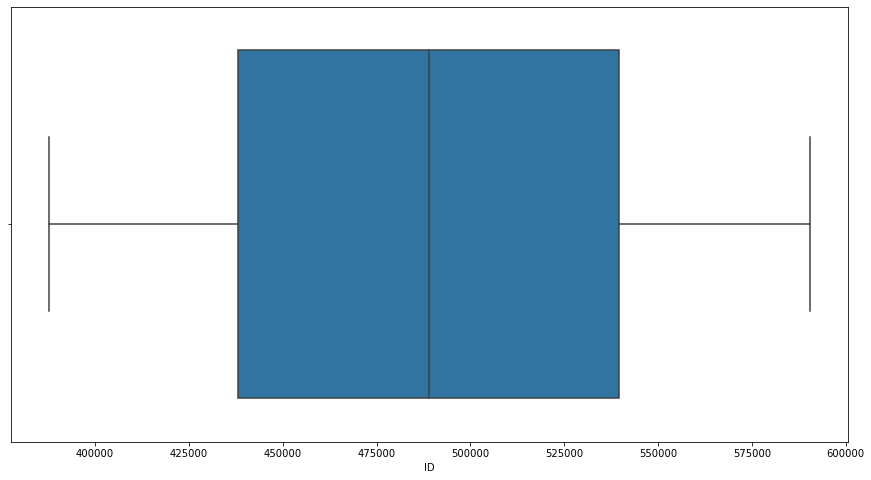

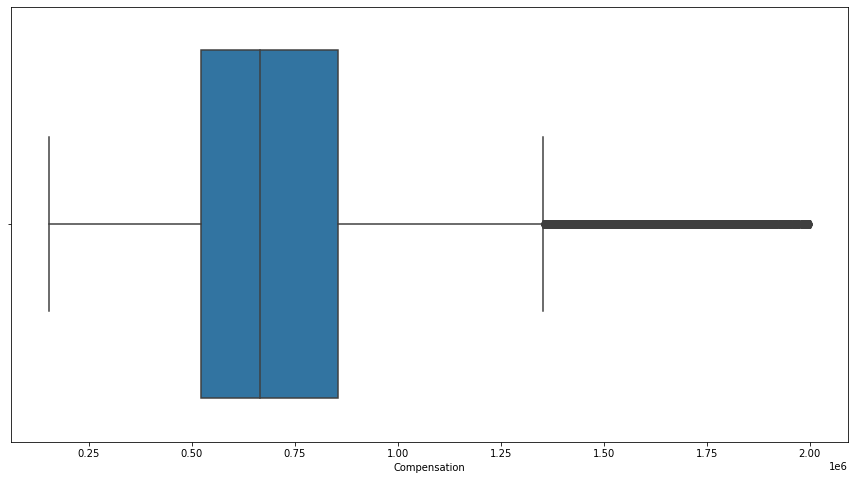

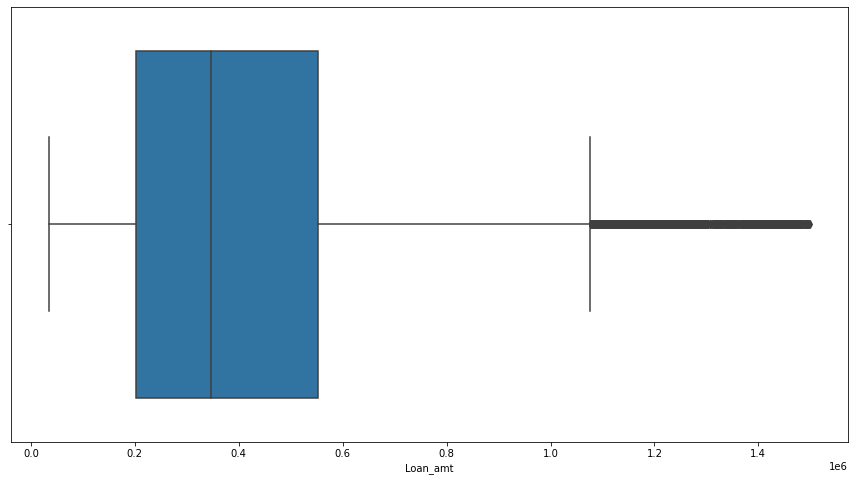

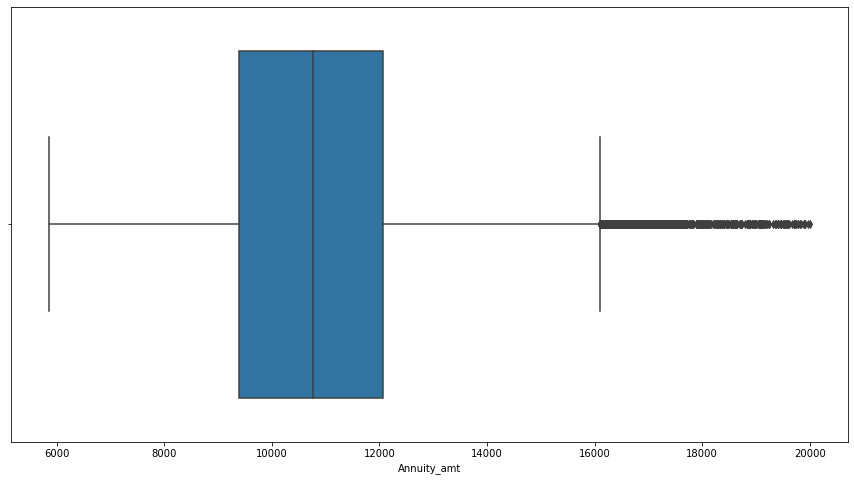

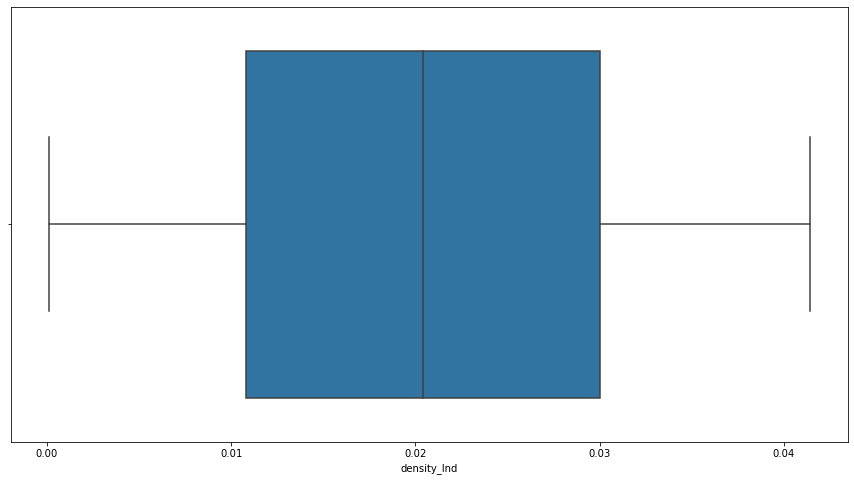

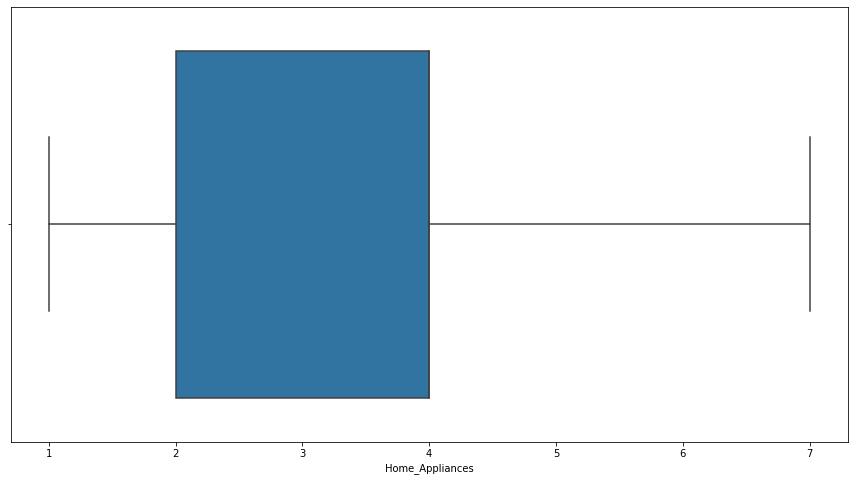

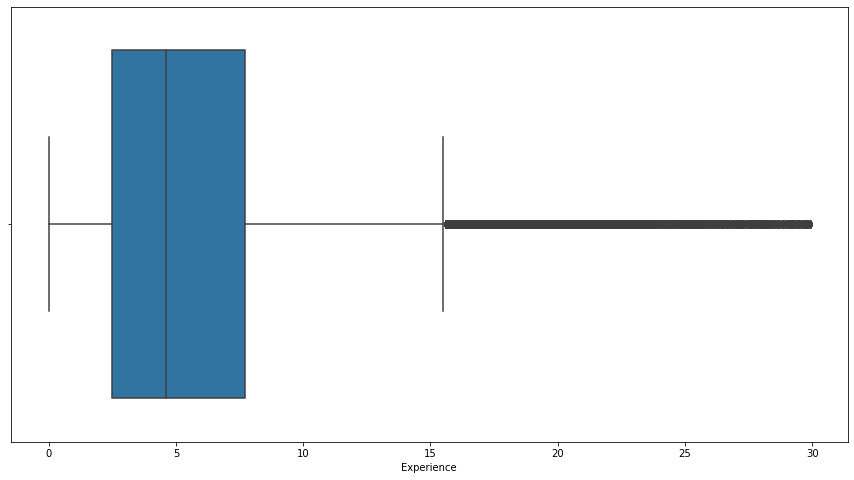

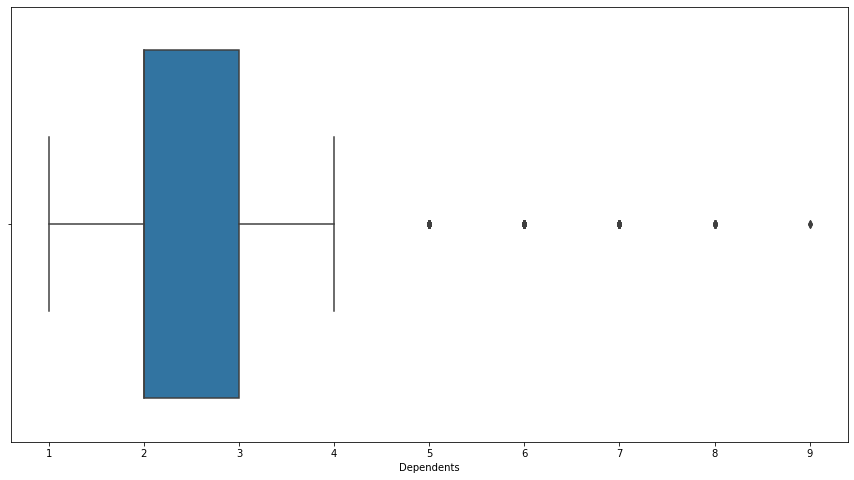

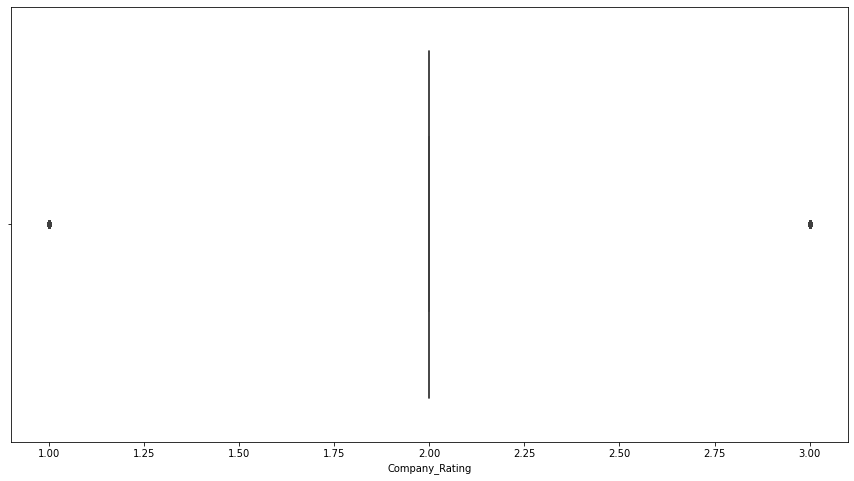

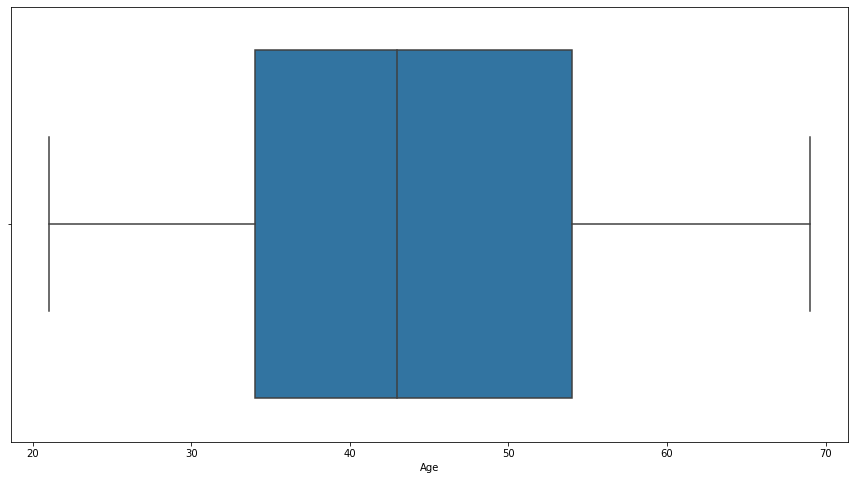

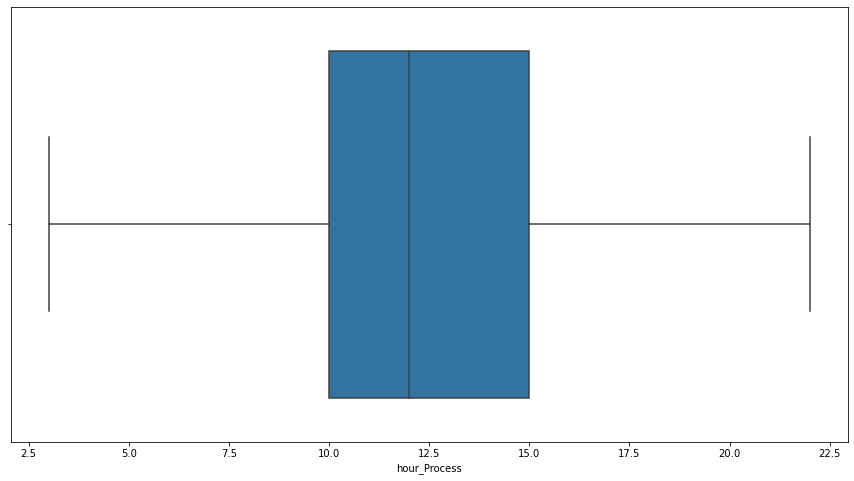

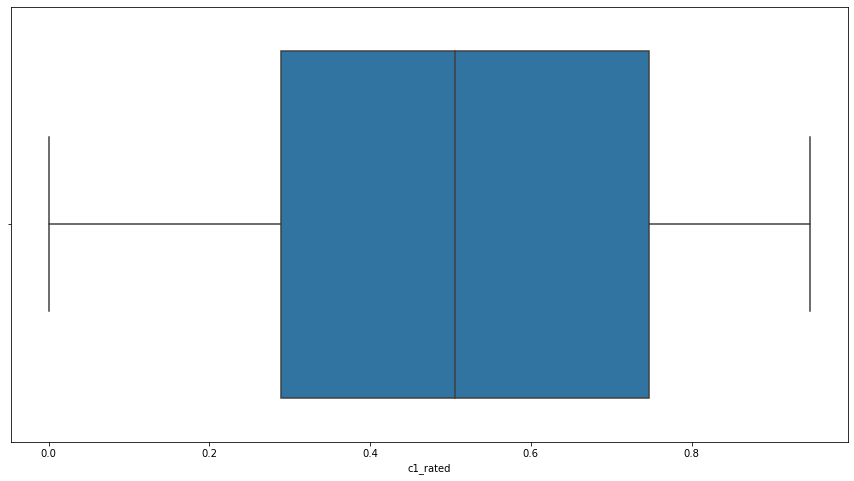

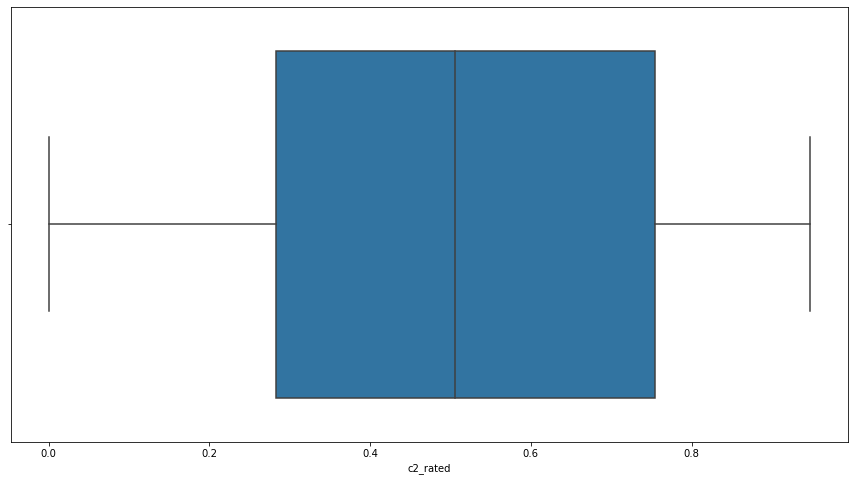

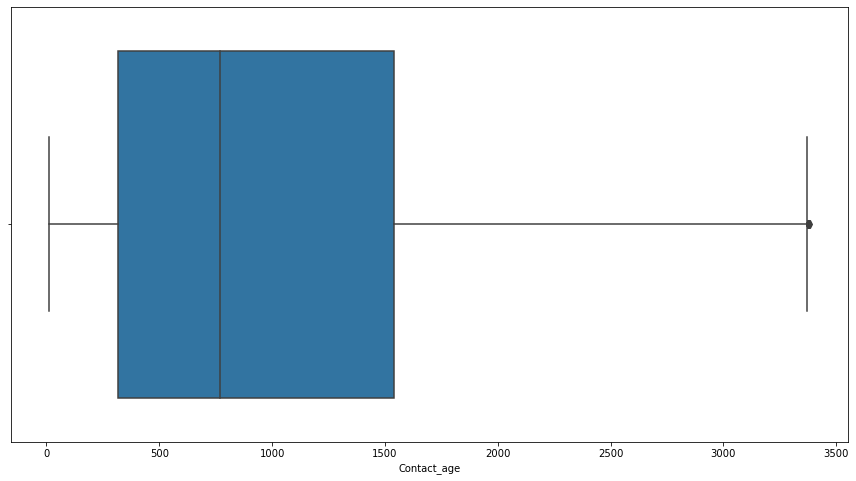

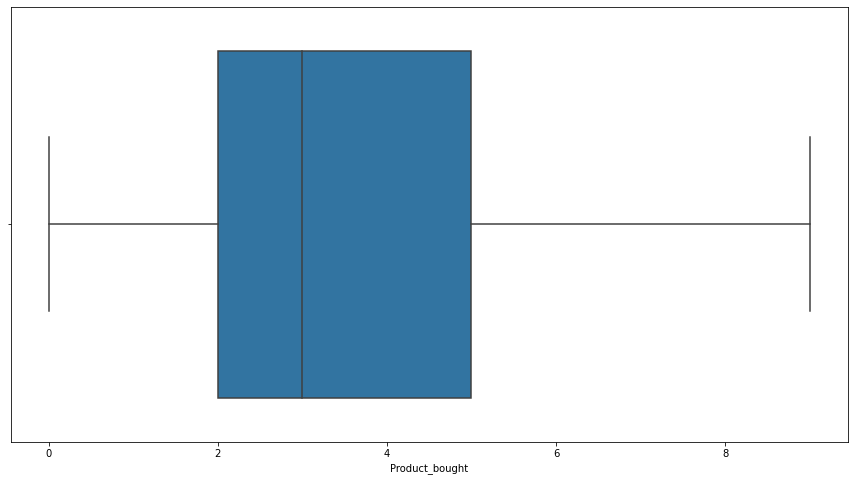

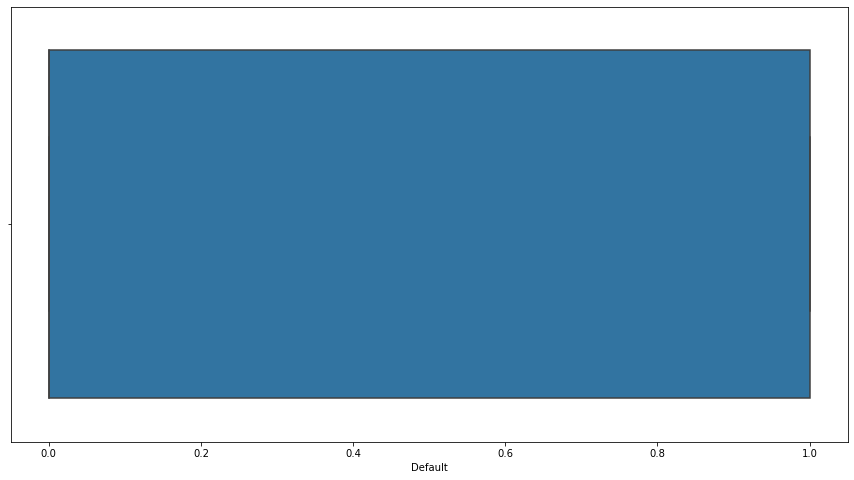

In [396]:
plt.rcParams["figure.figsize"]=[15,8]
for var in df_num:
    sns.boxplot(df_train[var])
    plt.show()

In [397]:
df_train.shape

(127108, 33)

In [398]:
#The remaining observations after Outlier treatment 127108

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [399]:
df_train["Company_Rating"]=df_train["Company_Rating"].astype("object")

In [400]:
df_num=df_train.select_dtypes(np.number)
df_cat=df_train.select_dtypes("object")

In [401]:
df_cat.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Company_Rating,Region,Addr_permanent,Permanent_Addr_tag
0,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,2.0,East,Yes,No
1,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,1.0,North,Yes,Yes
2,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,3.0,North,Yes,Yes
3,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,2.0,South,Yes,Yes
4,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,1.0,North,Yes,Yes


In [402]:
df_num.head()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,658040.0,13816.52,0.0304,4.0,0.9,3.0,46.0,10.0,0.077000,0.077,18.0,2.0,1.0
1,511643,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,46.0,12.0,0.184000,0.184,306.0,4.0,0.0
2,506688,284120.0,101056.0,8390.40,0.0118,4.0,4.6,2.0,57.0,5.0,0.538000,0.538,281.0,4.0,0.0
3,499360,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,39.0,12.0,0.505929,0.561,20.0,4.0,0.0
4,438350,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,32.0,16.0,0.505929,0.200,2339.0,6.0,0.0


In [403]:
#Dropping ID column
df_num.drop("ID", axis=1, inplace=True)

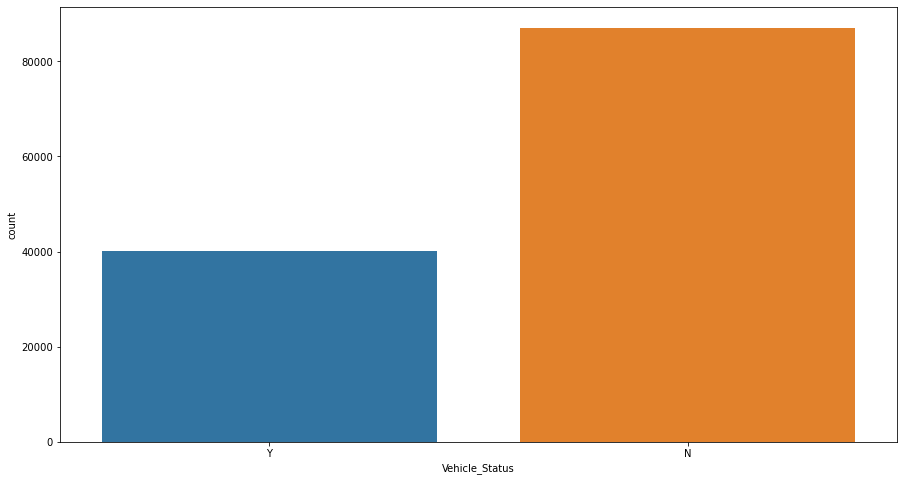

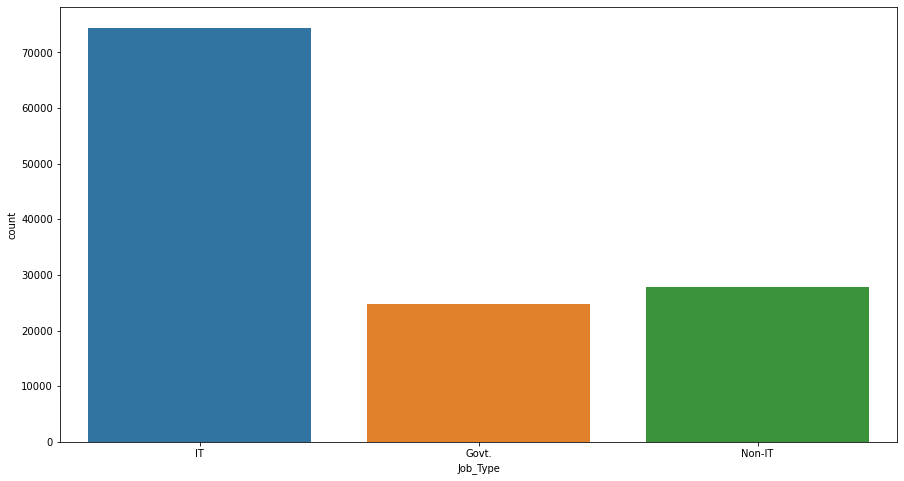

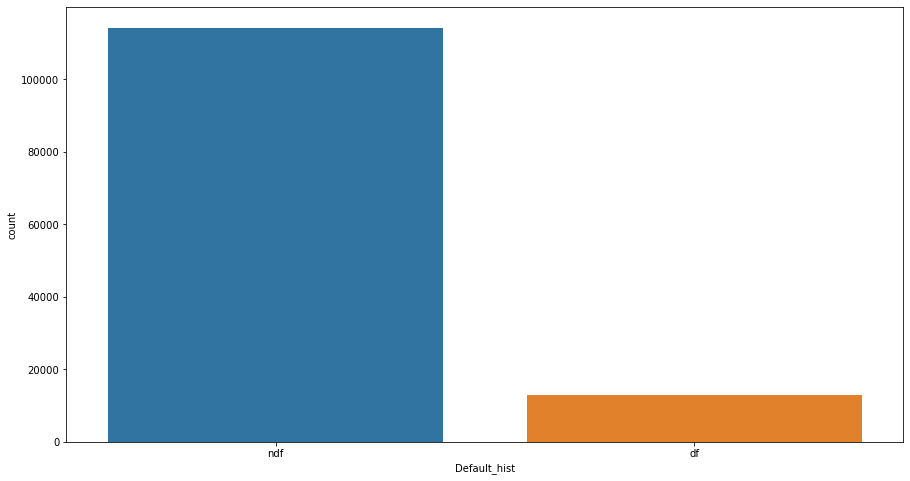

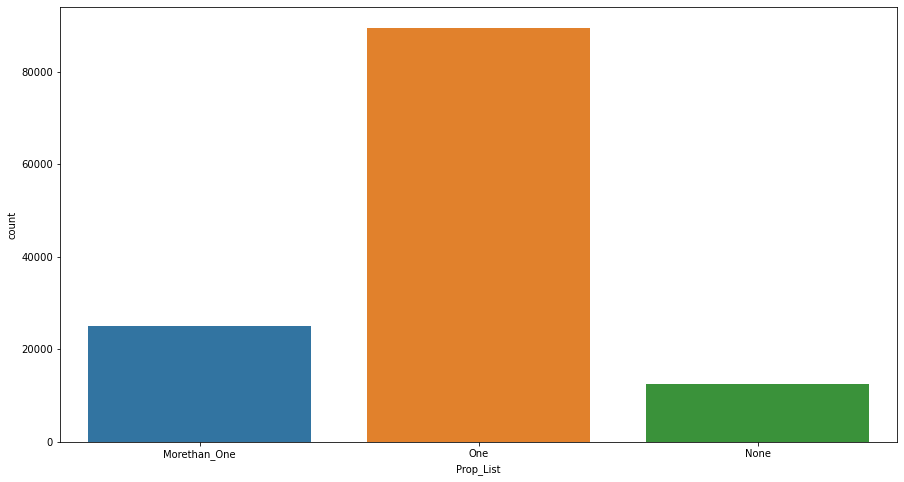

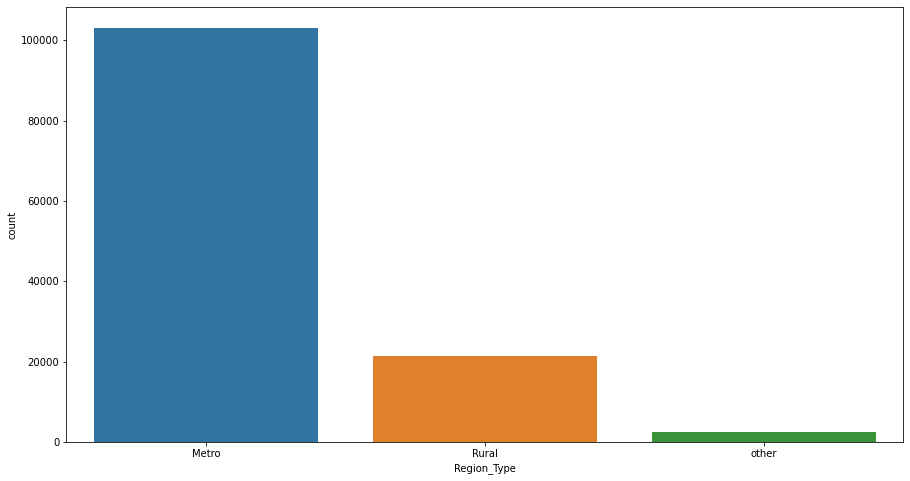

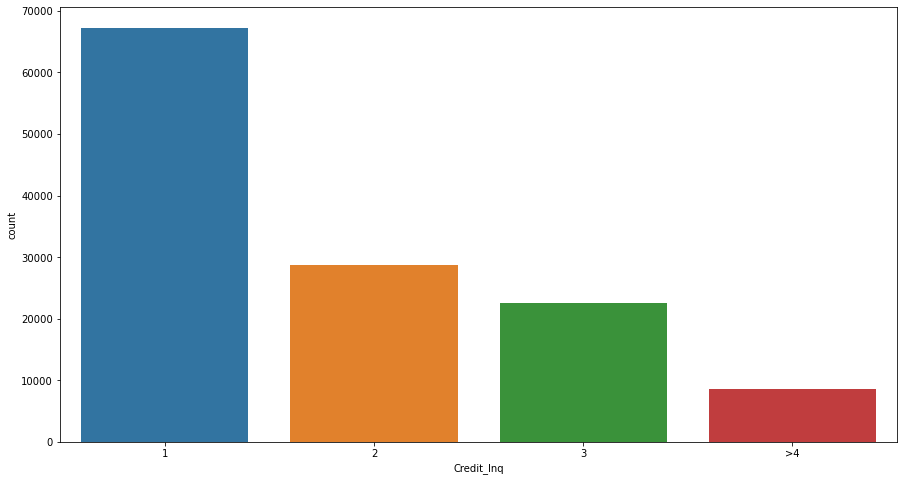

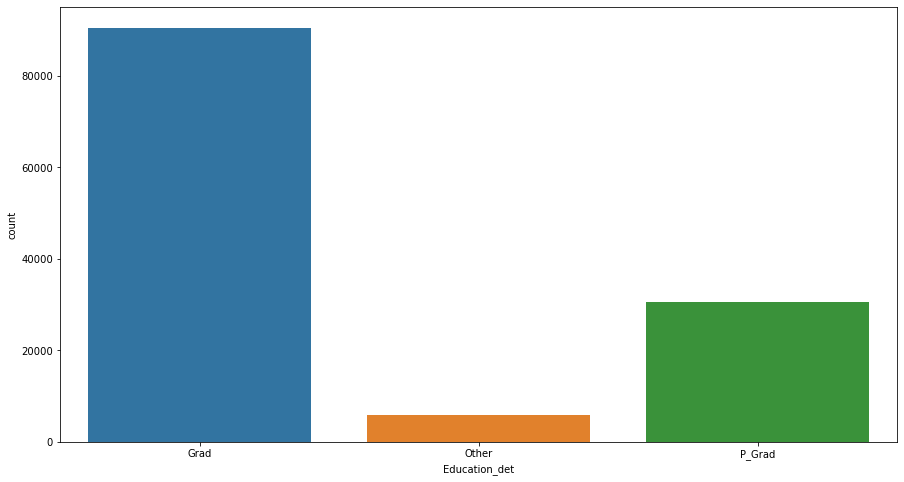

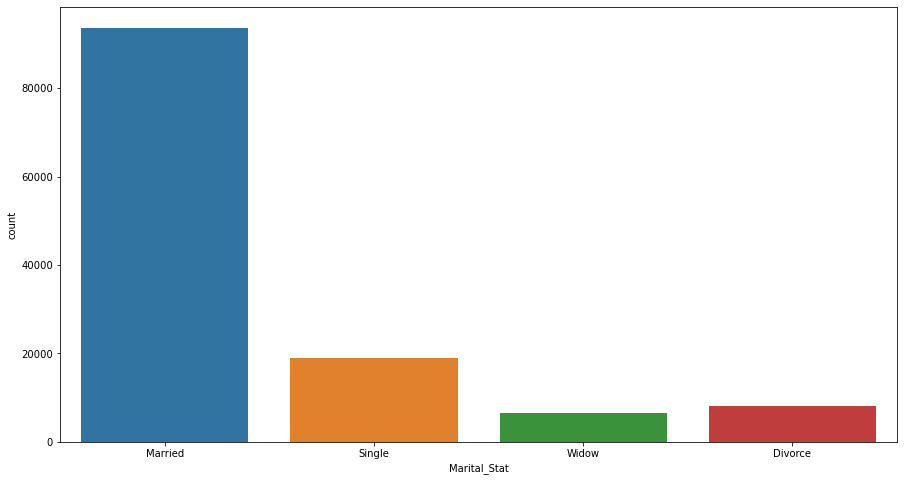

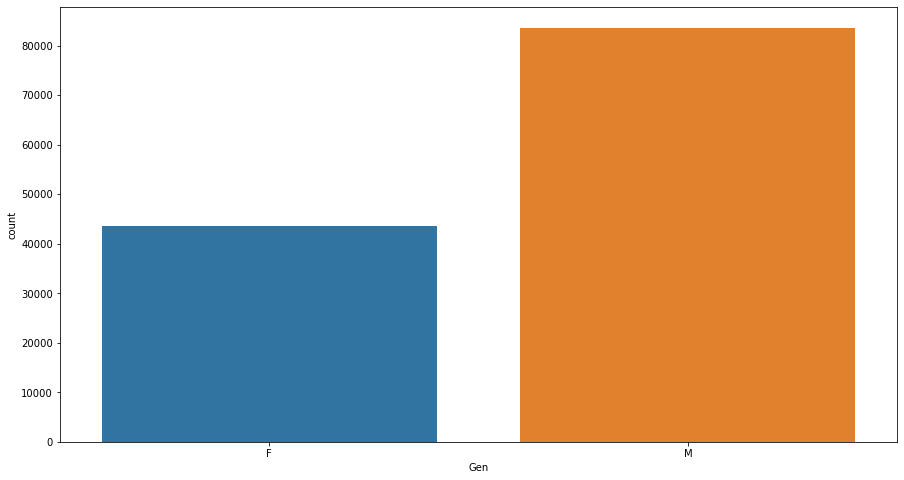

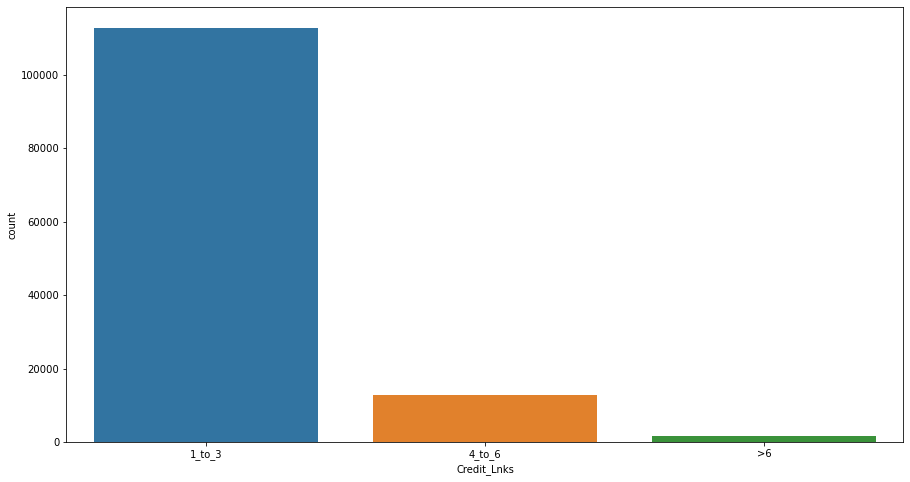

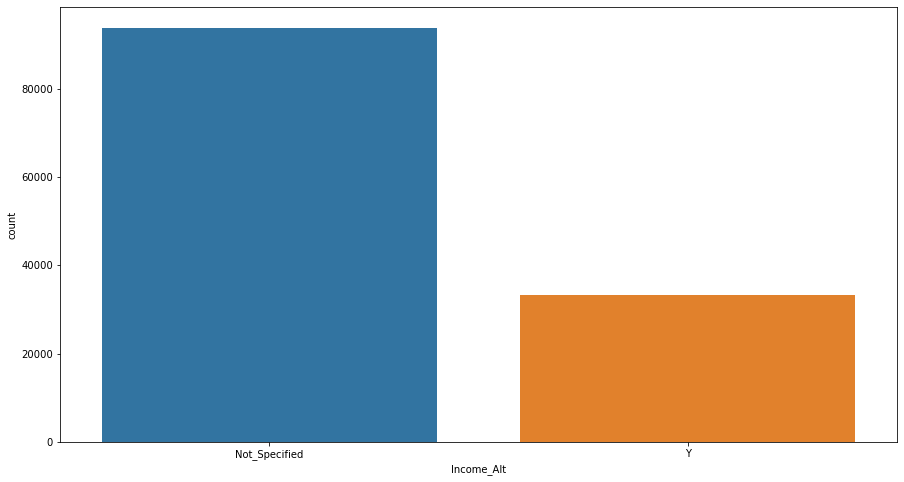

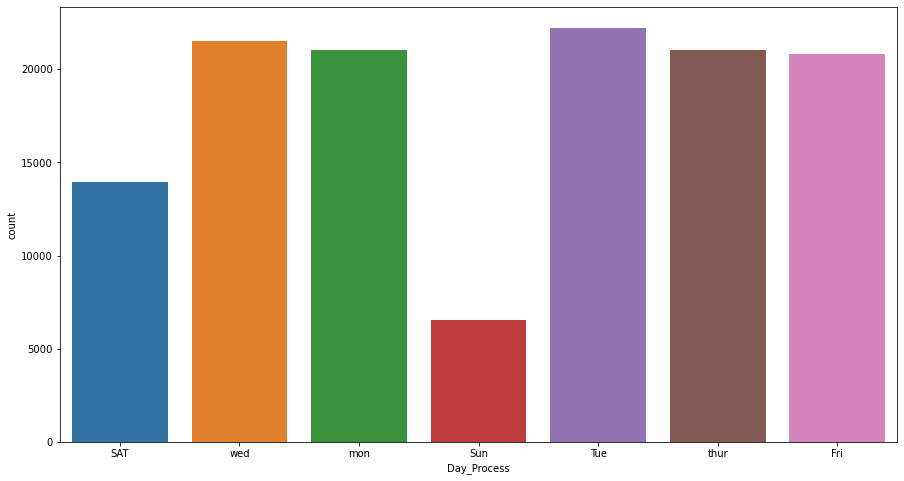

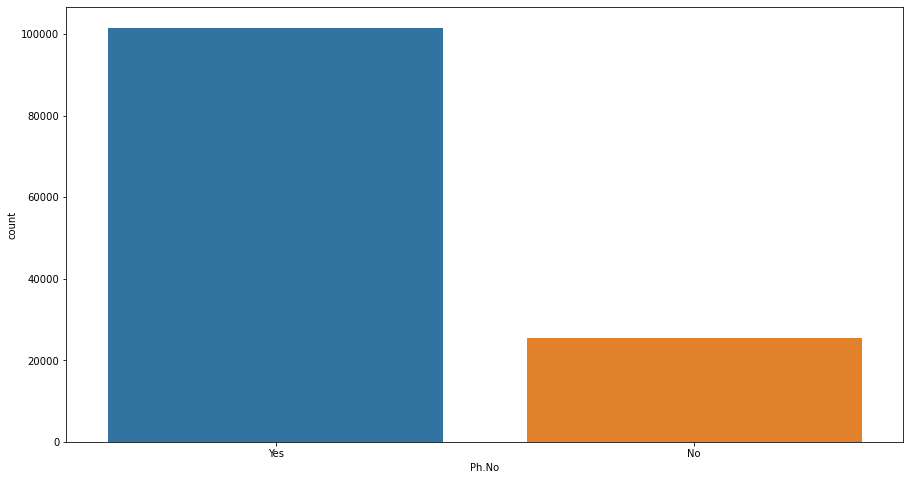

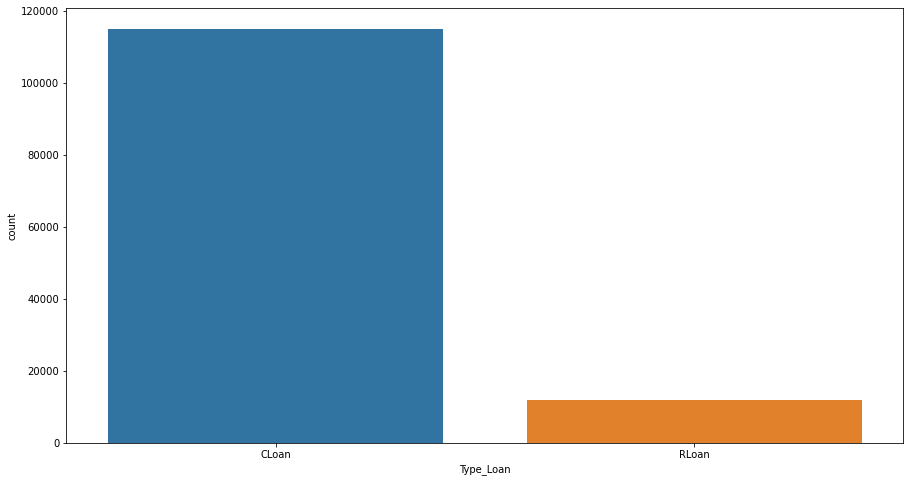

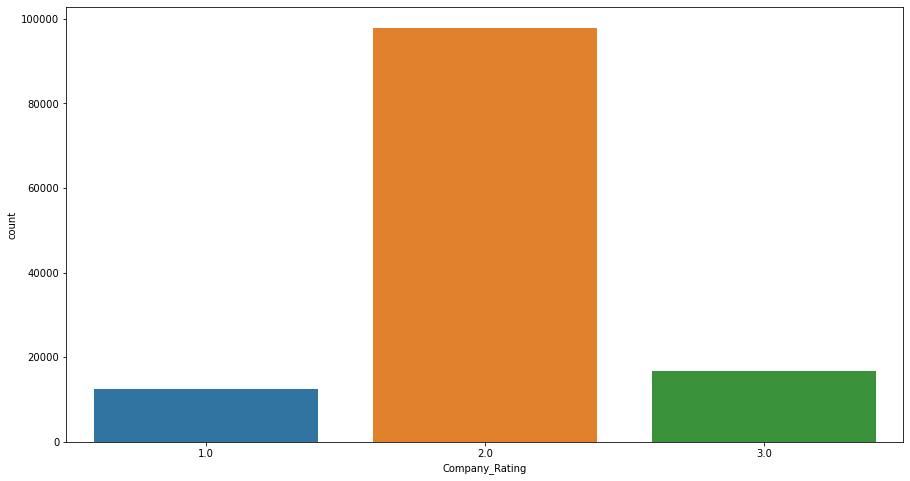

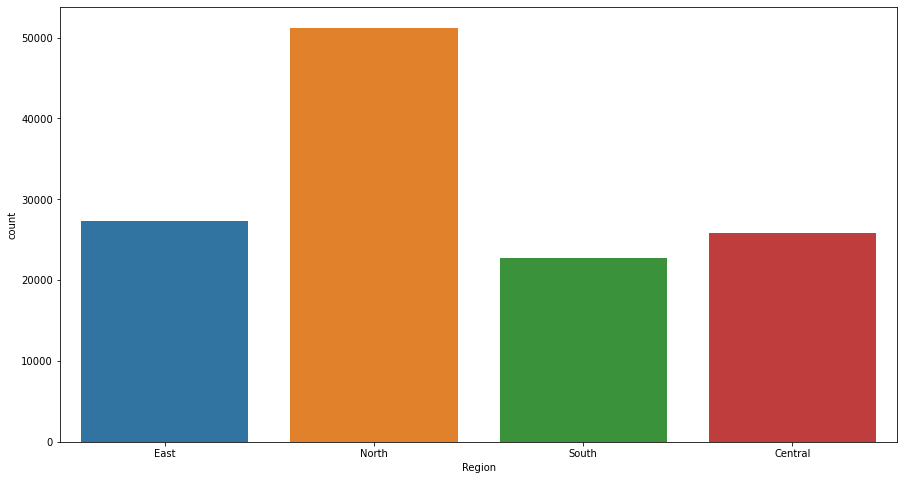

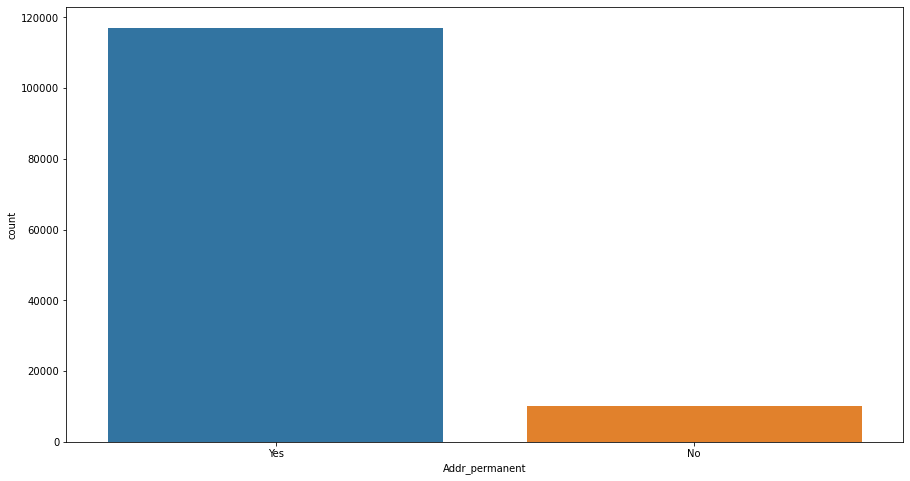

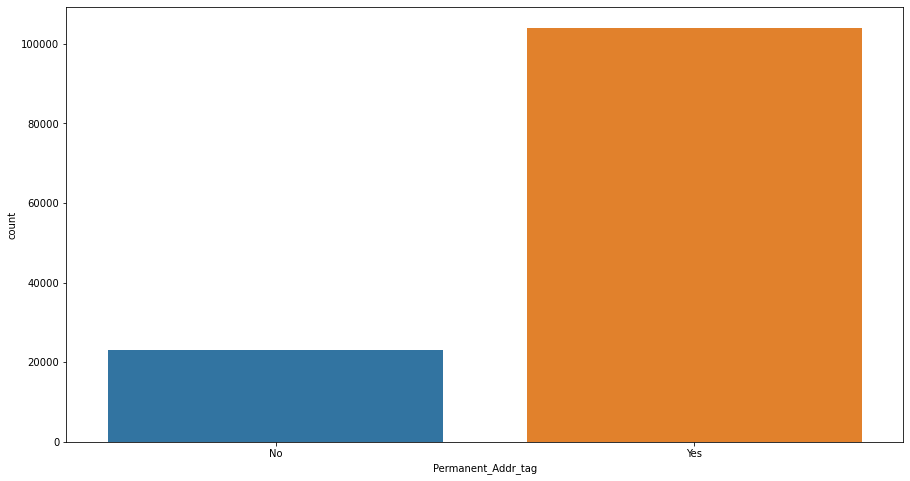

In [404]:
for var in df_cat:
    sns.countplot(df_train[var])
    plt.show()

In [ ]:
#Categorical univariante analysis shows that dominance of some categories by value count

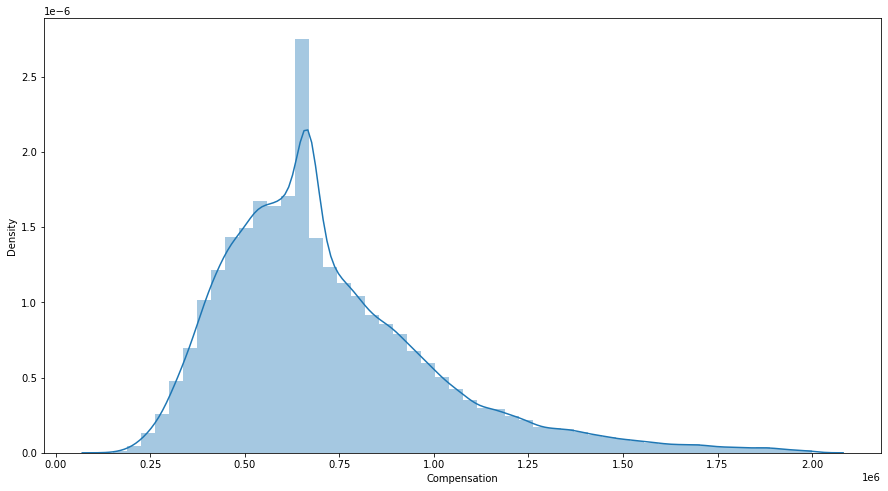

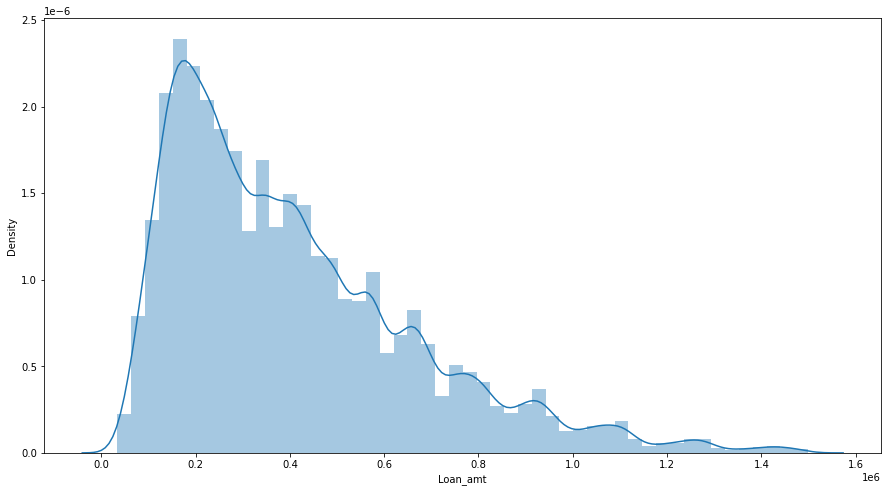

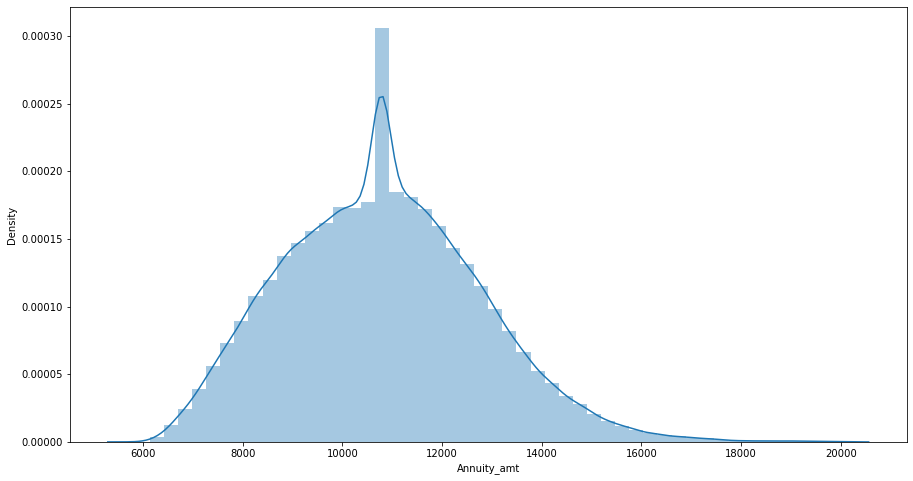

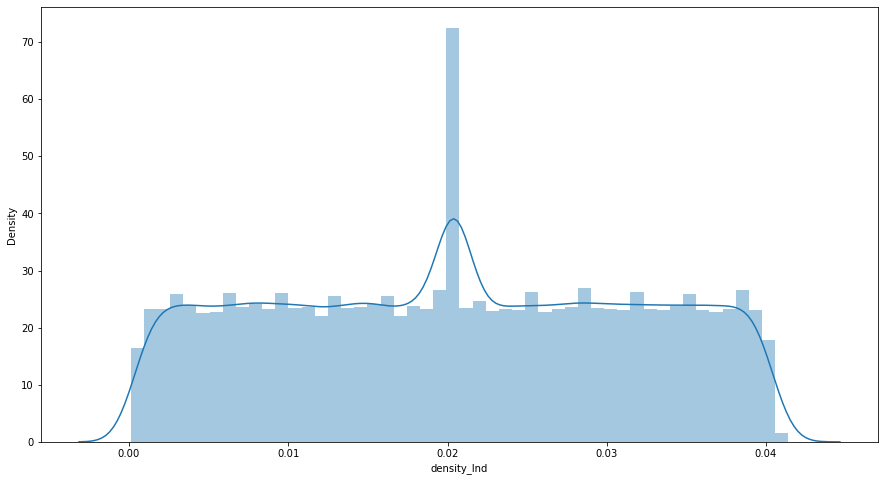

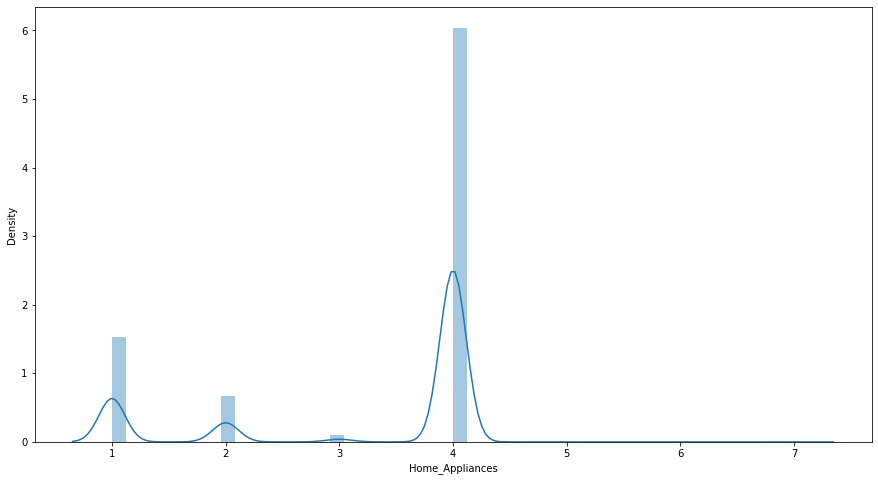

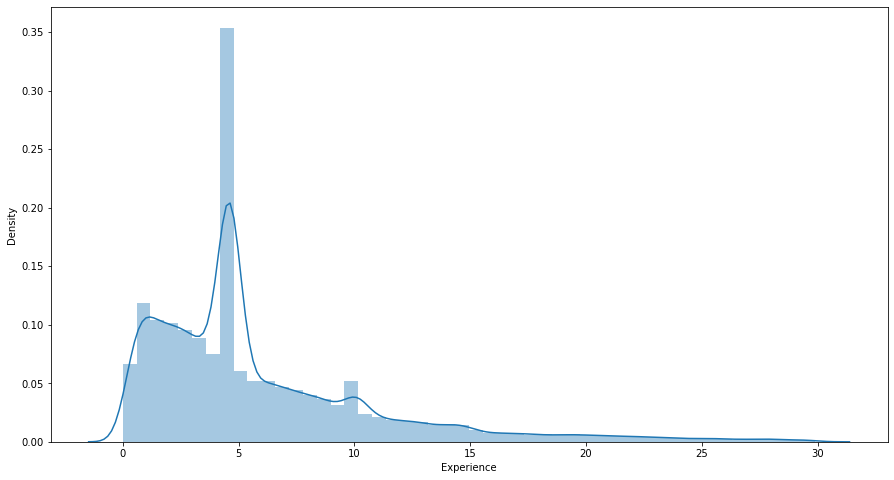

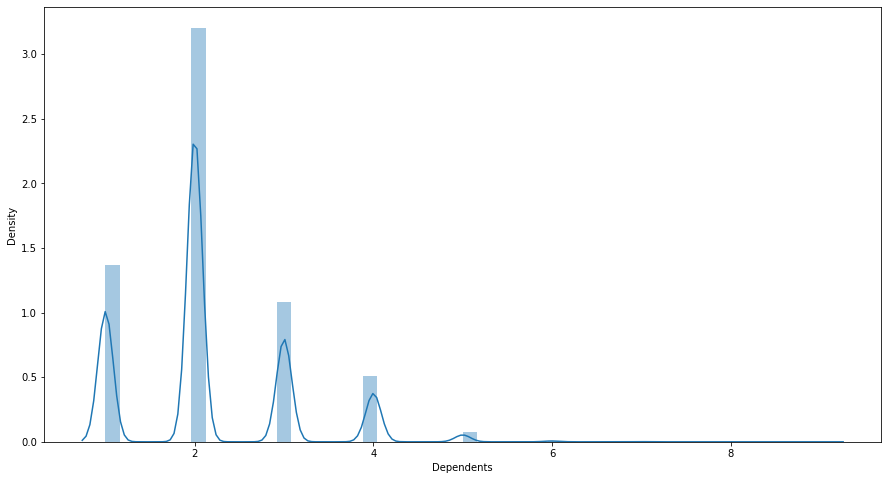

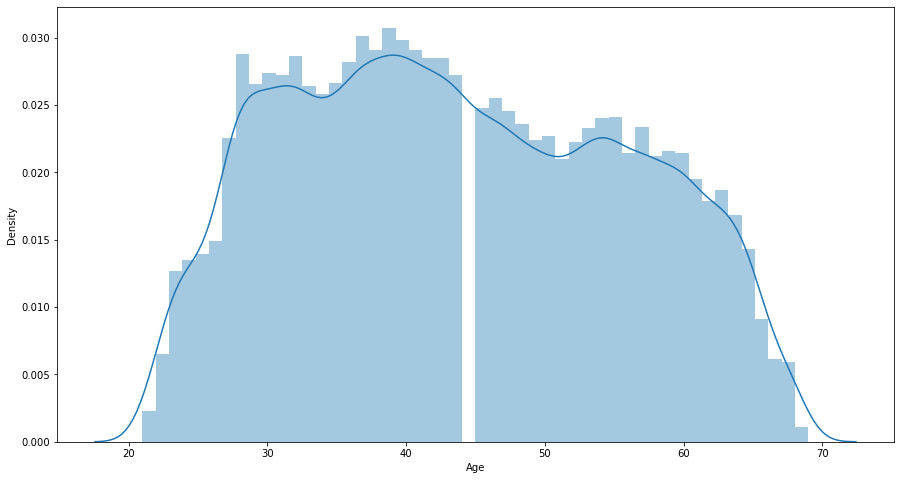

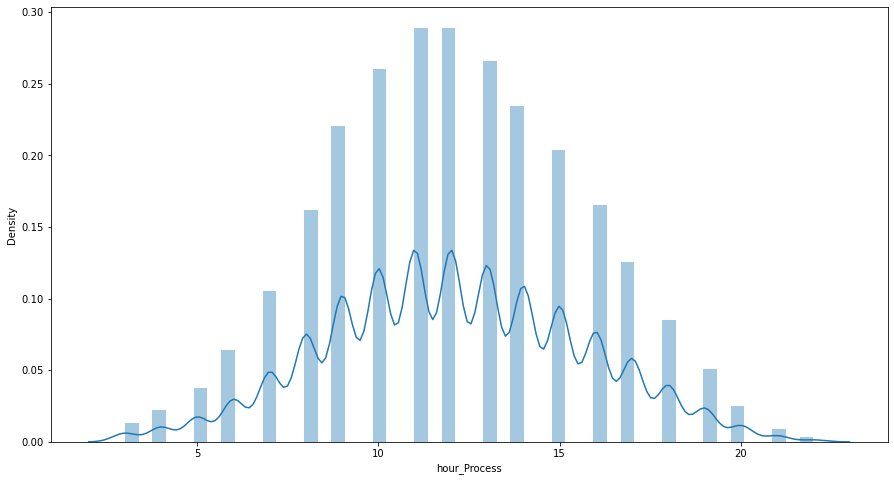

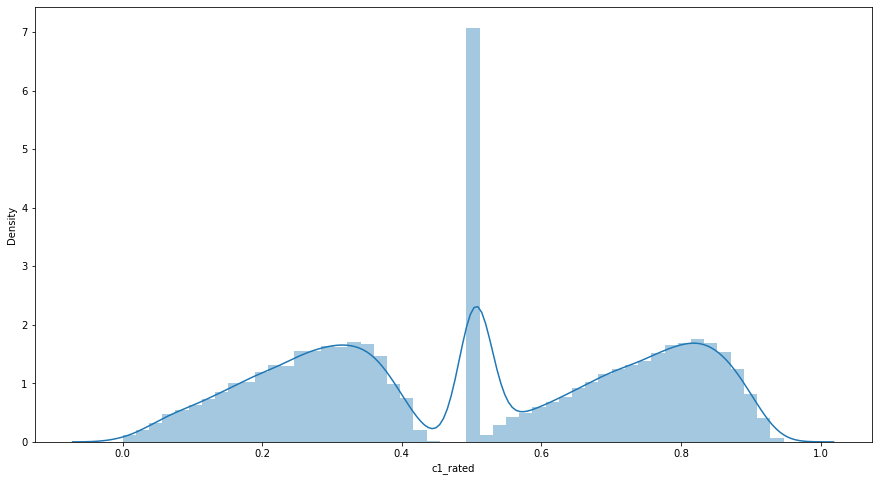

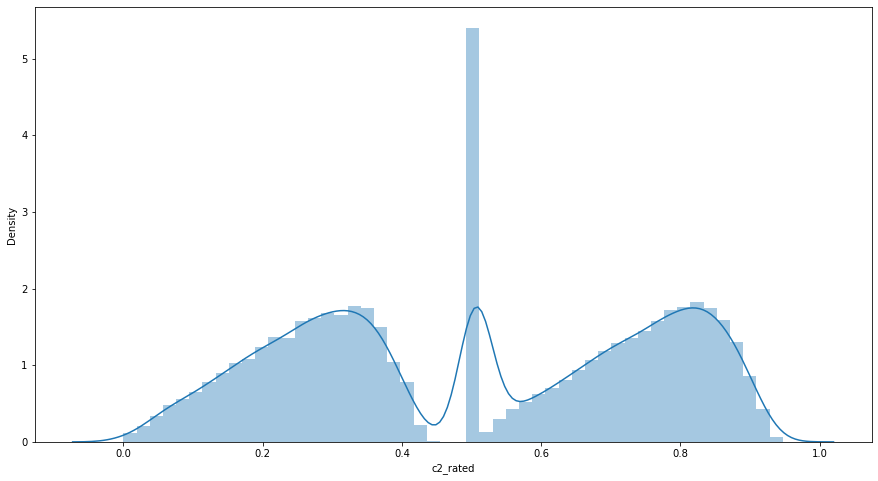

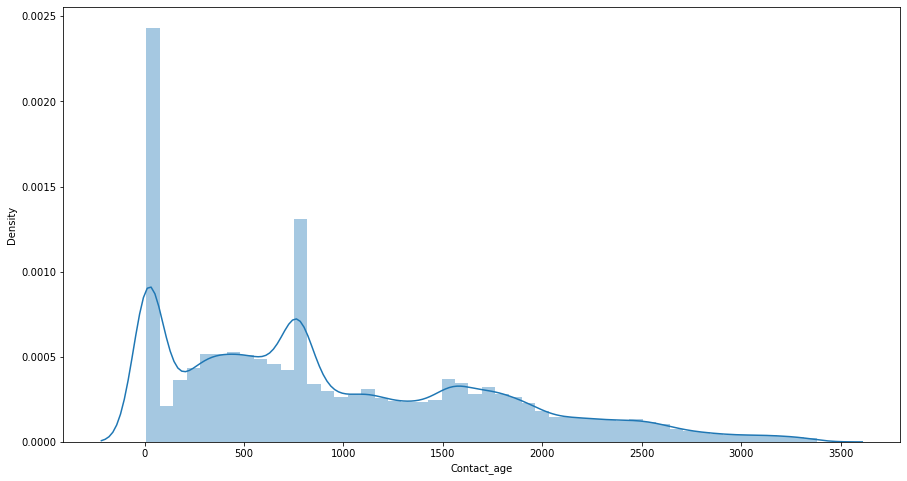

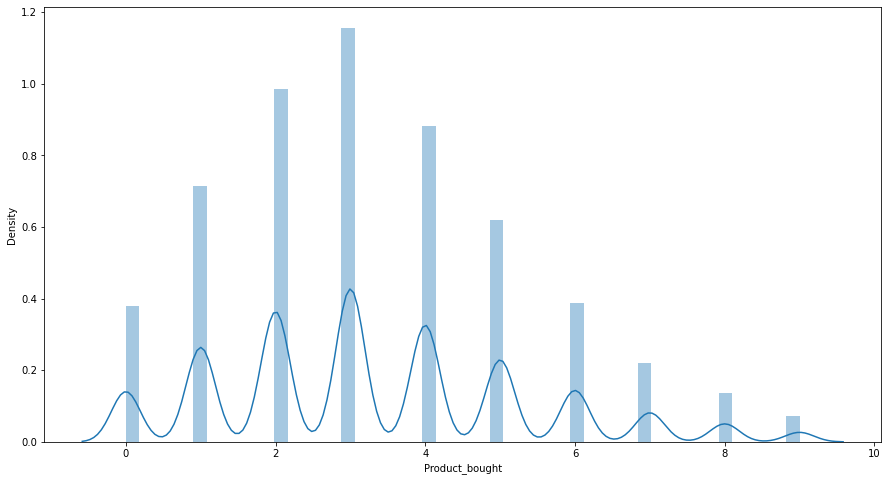

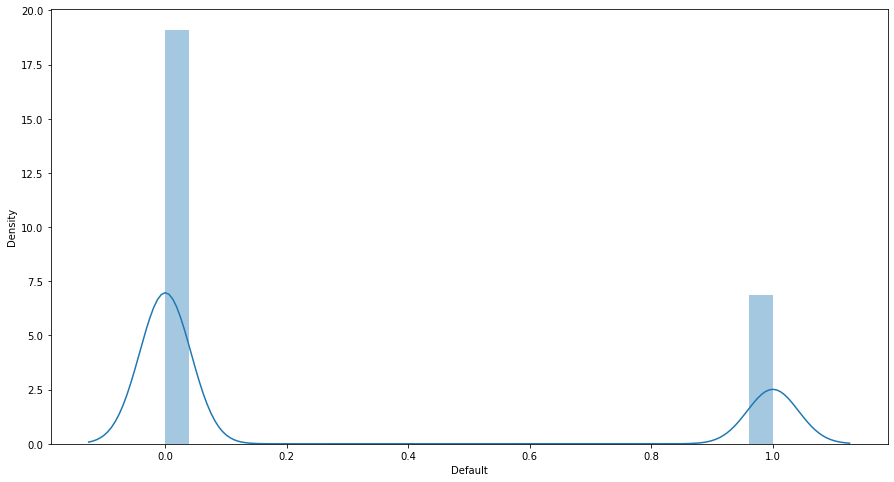

In [405]:
for var in df_num:
    sns.distplot(df_train[var])
    plt.show()

In [532]:
#Numeric variable univariante analsis shows that different range of distribution by different variables
#Transformation of some variables required

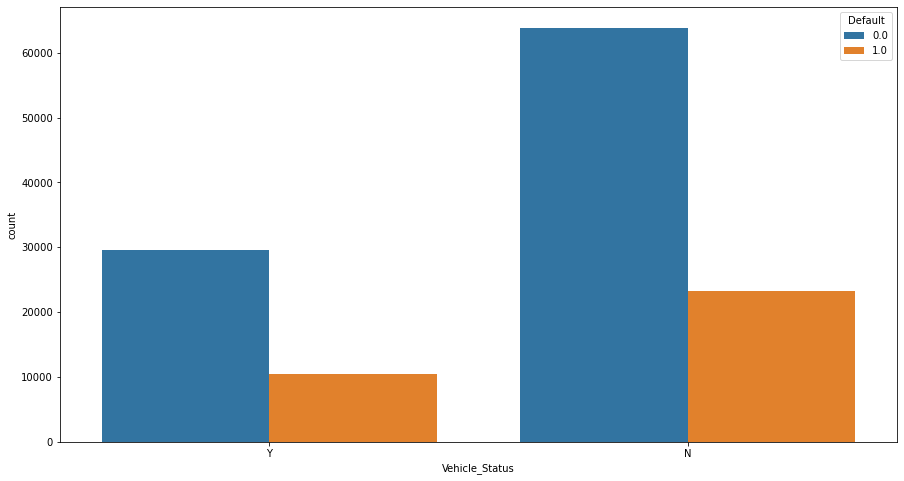

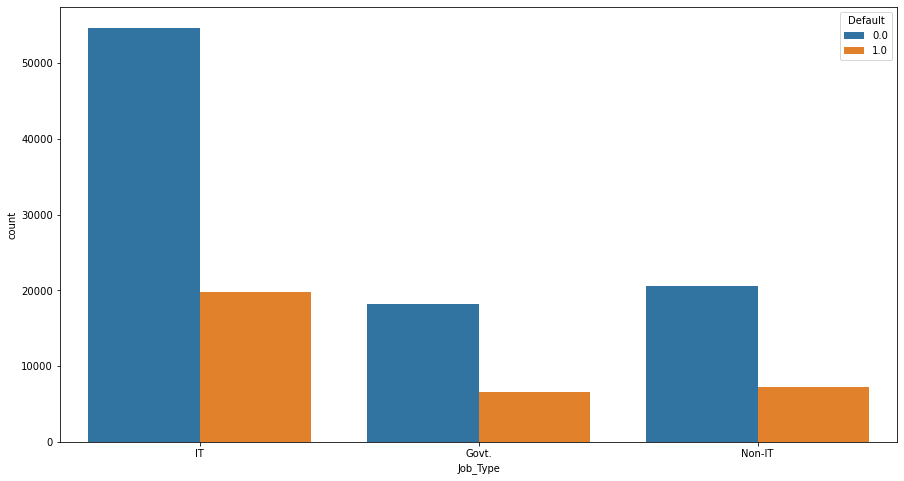

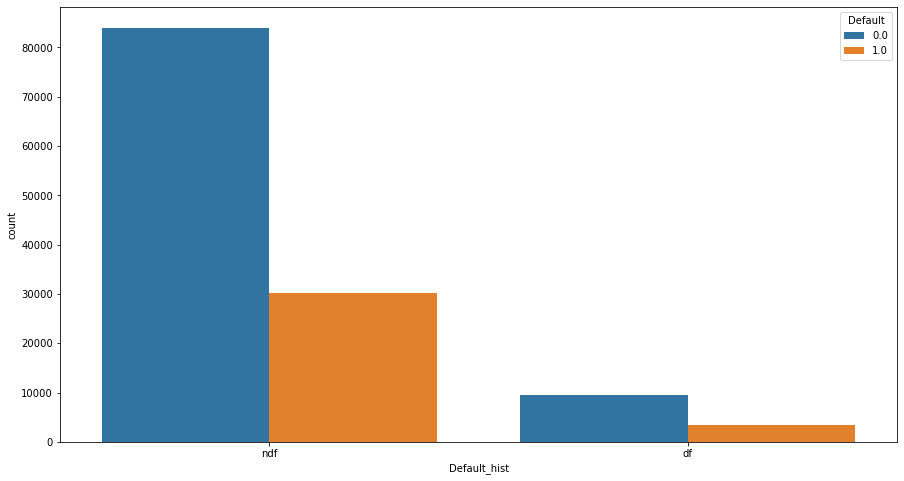

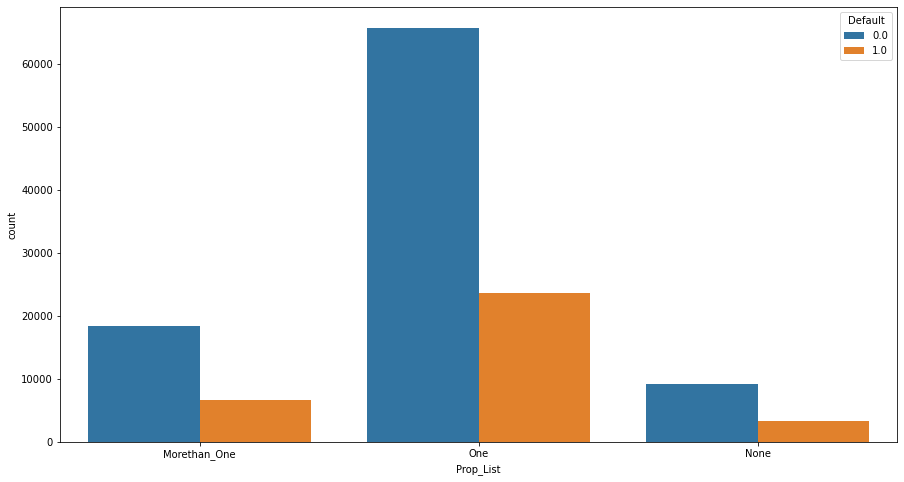

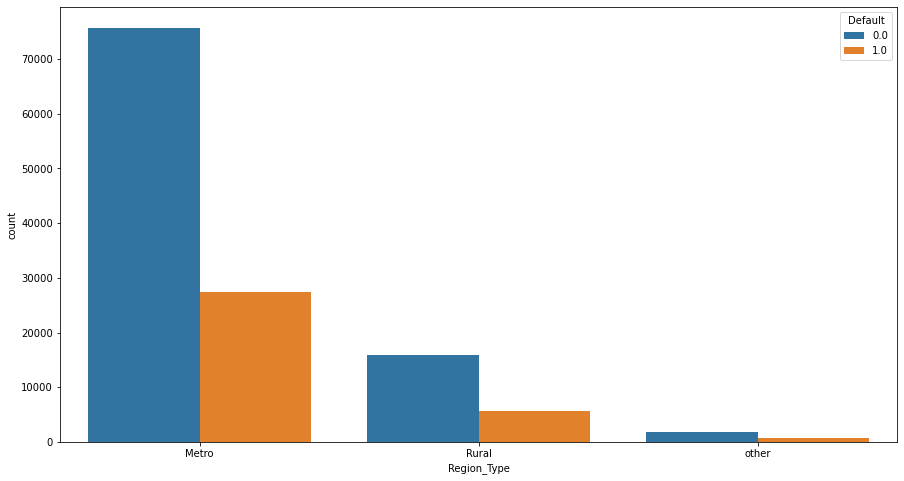

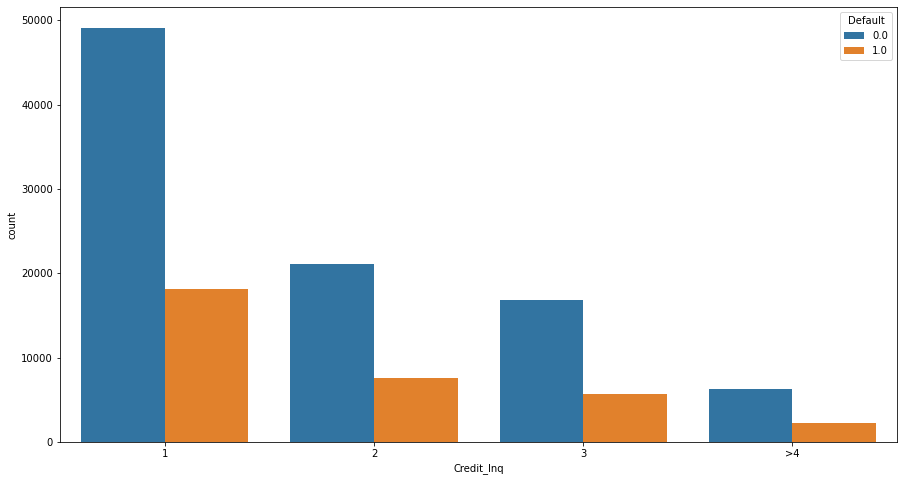

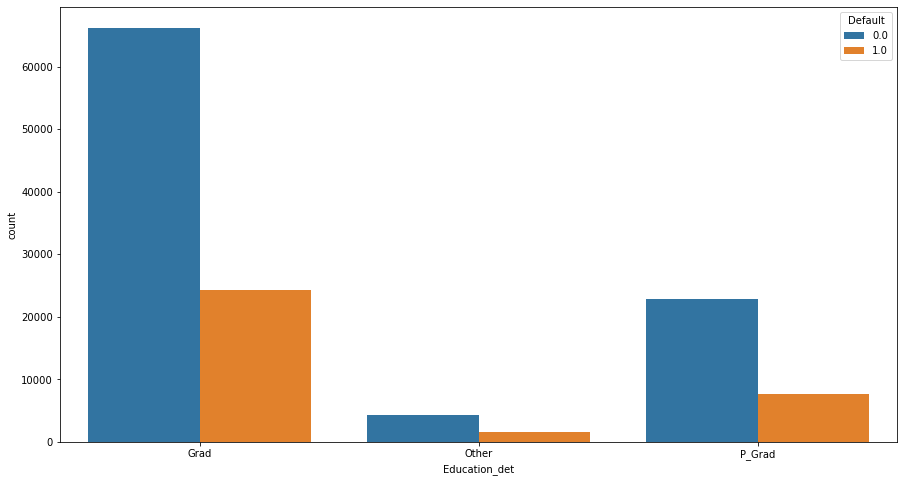

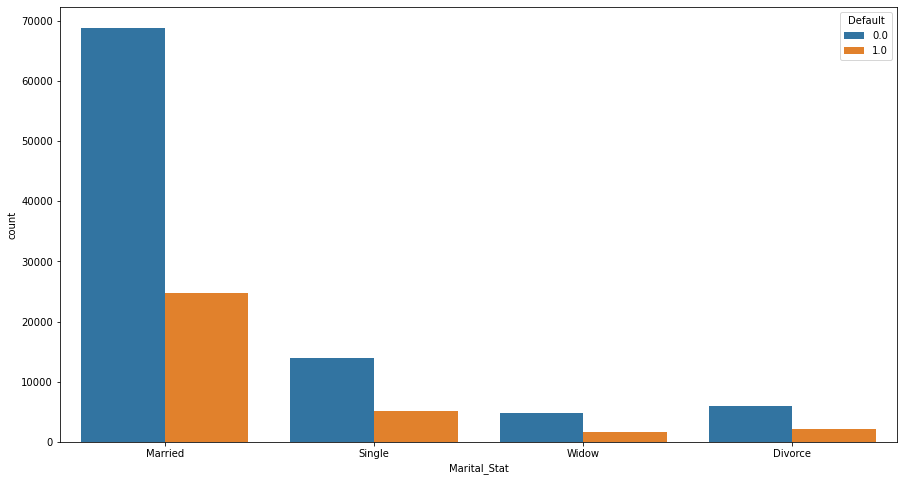

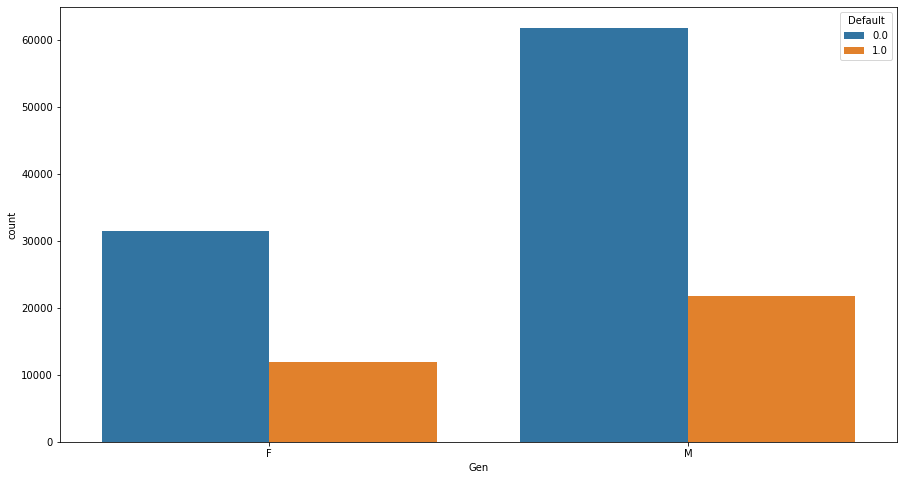

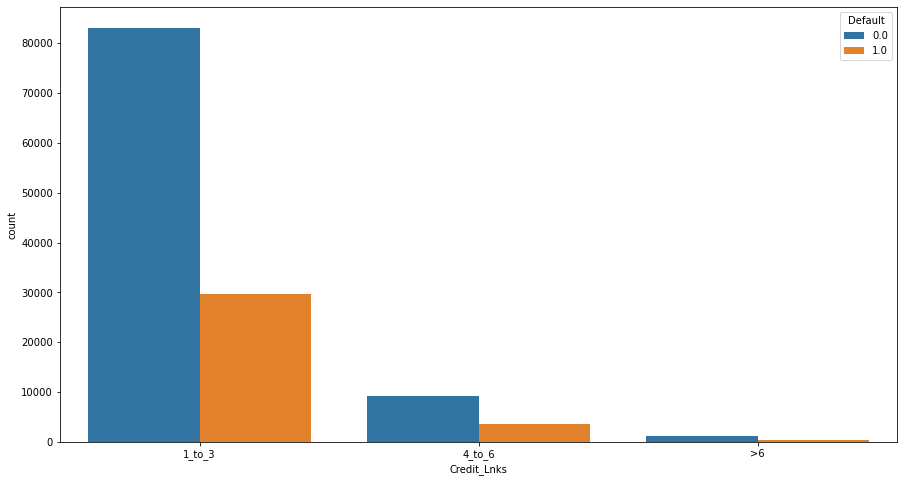

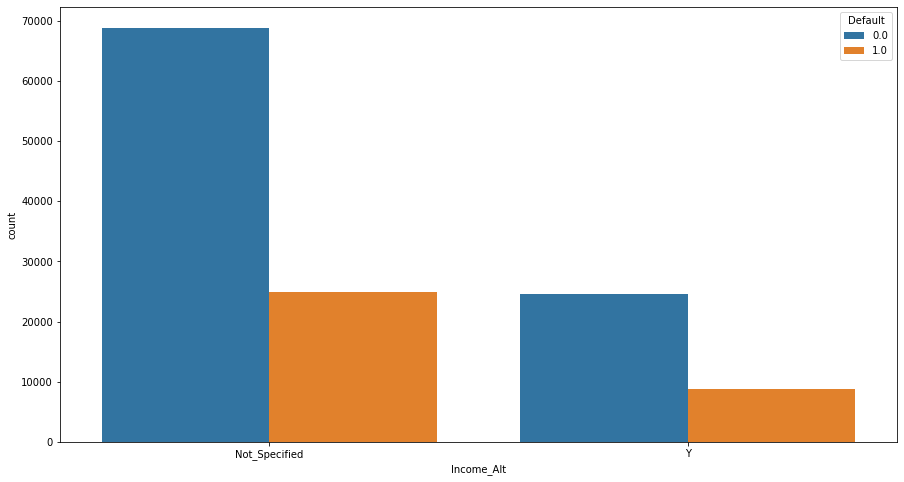

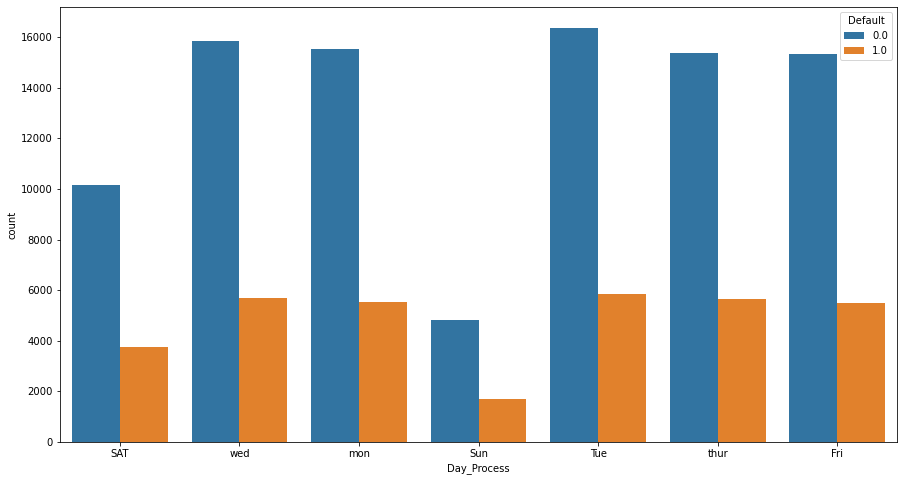

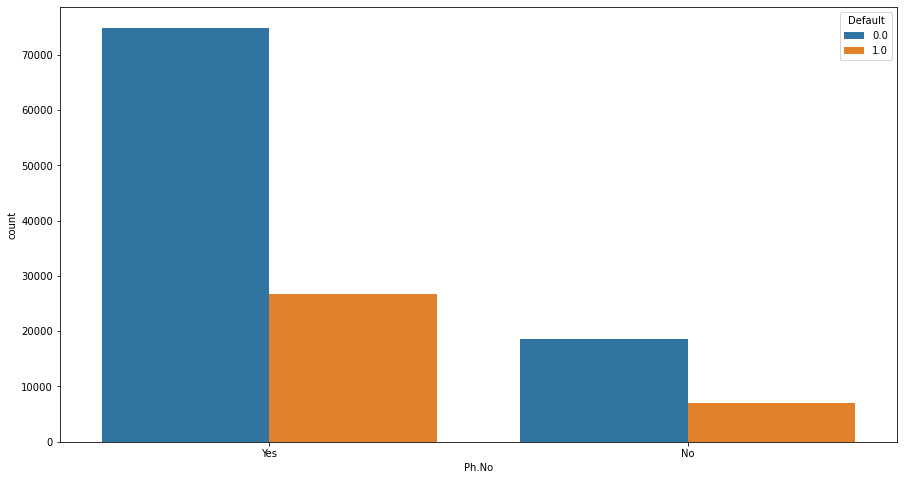

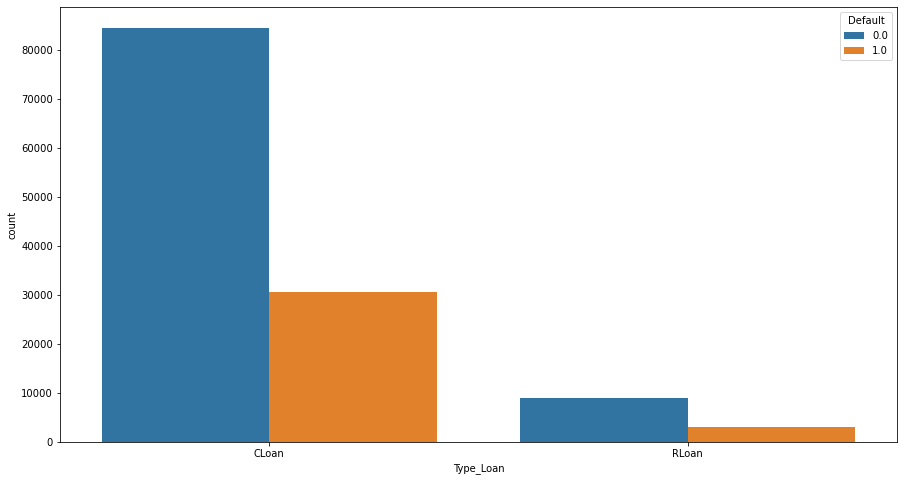

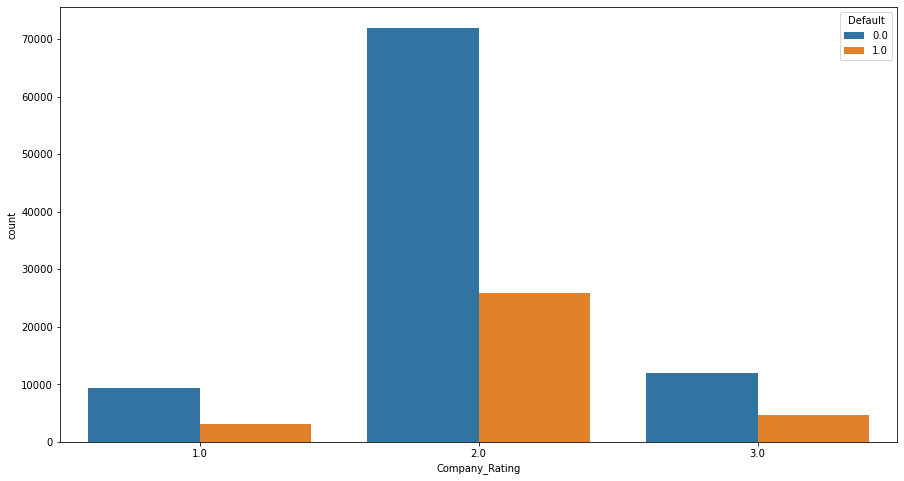

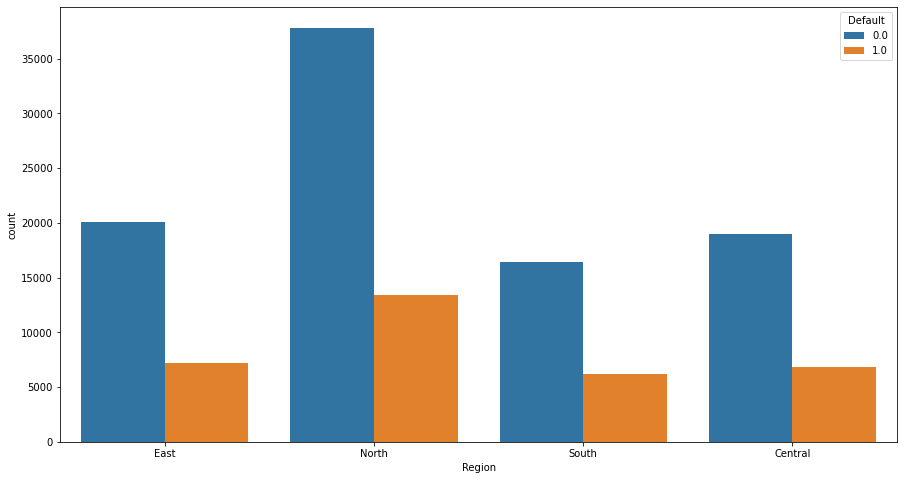

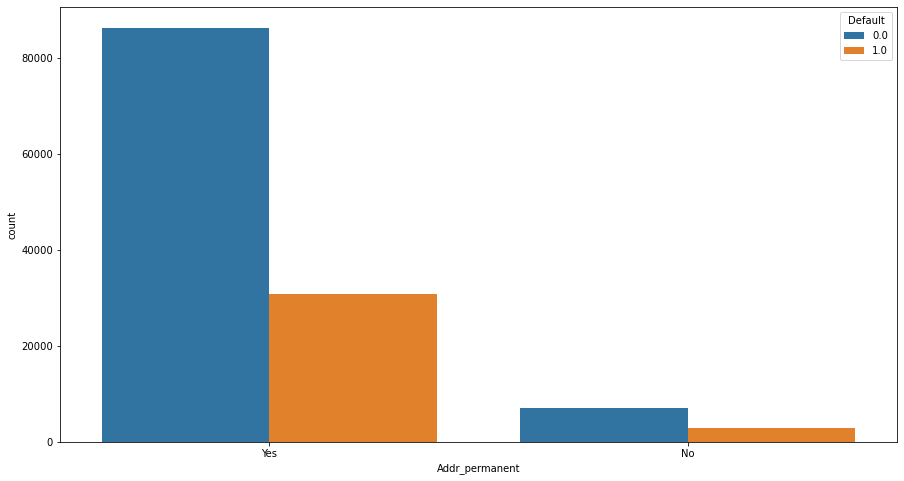

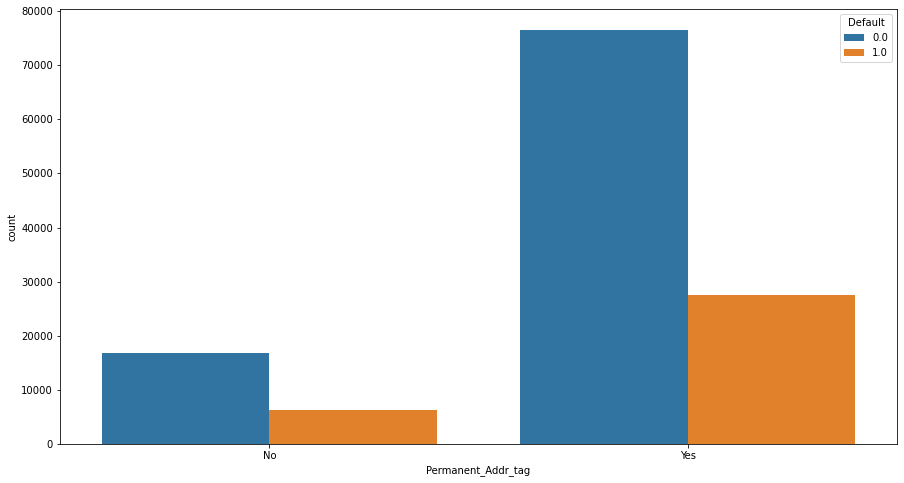

In [406]:
for var in df_cat:
    sns.countplot(df_train[var], hue=df_train["Default"])
    plt.show()

In [533]:
#Bivariante analysis of categorical variable shows all are affecting the Default variable

In [407]:
 #Since some variables are rightly skewed applying transformation

In [408]:
df_num.skew()

Compensation       1.258005
Loan_amt           1.151878
Annuity_amt        0.337268
density_Ind        0.000006
Home_Appliances   -1.163509
Experience         1.799374
Dependents         0.879892
Age                0.136041
hour_Process       0.038801
c1_rated          -0.023709
c2_rated          -0.023490
Contact_age        0.745134
Product_bought     0.516104
Default            1.065225
dtype: float64

In [ ]:
#Applying log transformation for Compensation and Loan_amt since right skewed

In [409]:
df_num_log=np.log(df_num[["Compensation", "Loan_amt"]])

In [534]:
#Applyimg sqrt transformation for Experience since it contains zero values

In [410]:
df_num_sqrt=np.sqrt(df_num[[ "Experience"]])

In [411]:
df_num_sqrt.skew()

Experience    0.677619
dtype: float64

In [412]:
df_num_log.skew()

Compensation    0.090395
Loan_amt       -0.207518
dtype: float64

In [413]:
df_num_nor=df_num[[ 'Annuity_amt', 'density_Ind',
       'Home_Appliances',  'Age', "Dependents",
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age',
       'Product_bought', "Default"]]

In [414]:
df_num_new=pd.concat([df_num_log,df_num_sqrt, df_num_nor], axis=1)

In [415]:
df_num_new.head()

,Compensation,Loan_amt,Experience,Annuity_amt,density_Ind,Home_Appliances,Age,Dependents,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,13.594677,13.397021,0.948683,13816.52,0.0304,4.0,46.0,3.0,10.0,0.077000,0.077,18.0,2.0,1.0
1,13.692463,12.196401,1.732051,11173.06,0.0194,1.0,46.0,3.0,12.0,0.184000,0.184,306.0,4.0,0.0
2,12.557152,11.523430,2.144761,8390.40,0.0118,4.0,57.0,2.0,5.0,0.538000,0.538,281.0,4.0,0.0
3,12.742198,12.095186,2.167948,7184.13,0.0373,2.0,39.0,4.0,12.0,0.505929,0.561,20.0,4.0,0.0
4,14.046539,13.259888,2.626785,13212.77,0.0138,1.0,32.0,3.0,16.0,0.505929,0.200,2339.0,6.0,0.0


## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [535]:
#Encoding Categorical variables

In [416]:
encod= pd.get_dummies(df_cat, drop_first=True)

In [417]:
encod.head()

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Company_Rating_2.0,Company_Rating_3.0,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1
2,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1
4,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1


In [418]:
df_train_new=pd.concat([df_num_new, encod], axis=1)

In [ ]:
#New train data craeted after data preprocessing and all

In [419]:
df_train_new.shape

(127108, 49)

In [420]:
df_train_new["Default"]=df_train_new["Default"].astype("int64")

### Loading test data set

In [421]:
df_test=pd.read_csv("Test_Set_TVS.csv")

In [422]:
df_test.shape

(56760, 32)

In [423]:
percent_null=(df_test.isnull().sum()/len(df_test))*100
percent_null[percent_null>0]

Compensation        4.844961
Vehicle_Status      6.841085
Annuity_amt         3.458421
density_Ind         4.008104
Job_Type            7.610994
Prop_List           1.605004
Home_Appliances     8.384426
Credit_Inq          2.054264
Experience         16.474630
Income_Alt          5.812192
Company_Rating      8.902396
c1_rated           12.972163
c2_rated            9.963002
Contact_age         6.205074
dtype: float64

In [424]:
df_test["Company_Rating"]=df_test["Company_Rating"].astype("object")

In [425]:
df_test.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating         object
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

In [ ]:
#Removing null values as same as train dataset

In [426]:
df_test["Compensation"].replace(np.nan, df_test["Compensation"].median(), inplace=True)
df_test["Vehicle_Status"].replace(np.nan, df_test["Vehicle_Status"].mode()[0], inplace=True)
df_test["Annuity_amt"].replace(np.nan, df_test["Annuity_amt"].median(), inplace=True)
df_test["density_Ind"].replace(np.nan, df_test["density_Ind"].median(), inplace=True)
df_test["Job_Type"].replace(np.nan, df_test["Job_Type"].mode()[0], inplace=True)
df_test["Prop_List"].replace(np.nan, df_test["Prop_List"].mode()[0], inplace=True)
df_test["Home_Appliances"].replace(np.nan, df_test["Home_Appliances"].median(), inplace=True)
df_test["Credit_Inq"].replace(np.nan, df_test["Credit_Inq"].mode()[0], inplace=True)
df_test["Experience"].replace(np.nan, df_test["Experience"].median(), inplace=True)
df_test["Income_Alt"].replace(np.nan, df_test["Income_Alt"].mode()[0], inplace=True)
df_test["Company_Rating"].replace(np.nan, df_test["Company_Rating"].mode()[0], inplace=True)
df_test["c1_rated"].replace(np.nan, df_test["c1_rated"].mean(), inplace=True)
df_test["c2_rated"].replace(np.nan, df_test["c2_rated"].mean(), inplace=True)
df_test["Contact_age"].replace(np.nan, df_test["Contact_age"].median(), inplace=True)

In [427]:
df_test["Company_Rating"]=df_test["Company_Rating"].astype("object")

In [428]:
df_num_test=df_test.select_dtypes(np.number)
df_cat_test=df_test.select_dtypes("object")

In [429]:
df_num_test.dtypes

ID                   int64
Compensation       float64
Loan_amt           float64
Annuity_amt        float64
density_Ind        float64
Home_Appliances    float64
Experience         float64
Dependents         float64
Age                float64
hour_Process       float64
c1_rated           float64
c2_rated           float64
Contact_age        float64
Product_bought     float64
dtype: object

In [ ]:
#Encoding test dataset

In [430]:
encod_test= pd.get_dummies(df_cat_test, drop_first=True)

In [431]:
df_test_new=pd.concat([df_num_test, encod_test], axis=1)

In [432]:
X_train=df_train_new.drop("Default", axis=1)
y_train=df_train_new["Default"]

In [433]:
X_train.shape

(127108, 48)

In [434]:
X_test=df_test_new.copy()

In [435]:
X_test.drop("ID", axis=1, inplace=True)

In [436]:
X_test.shape

(56760, 48)

In [ ]:
#Since from univariante analysis we can see that dataset in imbalanced so doing some analysis

In [1]:
from imblearn.over_sampling import SMOTE

In [437]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Model 1

In [536]:
#Ada boost model

In [438]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score,classification_report, f1_score

In [439]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [440]:
from sklearn.ensemble import AdaBoostClassifier

In [441]:
ada_model = AdaBoostClassifier(n_estimators = 12, random_state = 10)

ada_model.fit(X_res, y_res)

AdaBoostClassifier(n_estimators=12, random_state=10)

In [442]:
y_pred_ada_model_train=ada_model.predict(X_train)
y_prob_ada_model_train=ada_model.predict_proba(X_train)

In [443]:
f1_score_ada_model_train=recall_score(y_train, y_pred_ada_model_train)
print("f1_score_ada_model_train",f1_score_ada_model_train)

f1_score_ada_model_train 0.26064493140922856


## Model 2 

In [537]:
#XGboost model

In [444]:
xgb_grid = XGBClassifier(max_depth = 10, n_estimators = 10, learning_rate= 0.8)

xgb_grid.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [445]:
y_pred_xgb_grid_train=xgb_grid.predict(X_train)
y_prob_xgb_grid_train=xgb_grid.predict_proba(X_train)

In [446]:
f1_score_xgb_grid_train=recall_score(y_train, y_pred_xgb_grid_train)
print("f1_score_xgb_grid_train",f1_score_xgb_grid_train)

f1_score_xgb_grid_train 0.22961577290812993


## Model 3

In [538]:
#Logestic regression model

In [447]:
from sklearn.linear_model import LogisticRegression

In [448]:
lr_base=LogisticRegression()
lr_base.fit(X_res, y_res)

LogisticRegression()

In [449]:
y_pred_lr_base_train=lr_base.predict(X_train)
y_prob_lr_base_train=lr_base.predict_proba(X_train)

In [450]:
f1_score_lr_base_train=recall_score(y_train, y_pred_lr_base_train)
print("f1_score_lr_base_train",f1_score_lr_base_train)

f1_score_lr_base_train 0.224716432092167


## Model 4

In [451]:
import statsmodels
import statsmodels.api as sm

In [452]:
logreg = sm.Logit(y_res, X_res).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.486408
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               186860
Model:                          Logit   Df Residuals:                   186812
Method:                           MLE   Df Model:                           47
Date:                Wed, 03 Aug 2022   Pseudo R-squ.:                  0.2983
Time:                        17:15:01   Log-Likelihood:                -90890.
converged:                       True   LL-Null:                   -1.2952e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Compensation               0.3653      0.011     33.177      0.000       0.344      

In [453]:
y_prob_lr_train=logreg.predict(X_train)

In [454]:
y_pred_lr_train = [ 0 if x < 0.5 else 1 for x in y_prob_lr_train]

In [455]:
from sklearn.metrics import roc_curve

In [456]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob_lr_train)

In [457]:

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.577707,0.563363,0.259785,0.014344
1,0.577677,0.563352,0.259790,0.014325
2,0.577825,0.563502,0.259728,0.014323
3,0.577766,0.563449,0.259754,0.014317
4,0.577677,0.563363,0.259785,0.014314


In [472]:
y_pred_lr_train_new = [ 0 if x < 0.259 else 1 for x in y_prob_lr_train]

In [473]:
y_prob_lr_test=logreg.predict(X_test)

In [474]:
y_pred_lr_test = [ 0 if x < 0.259 else 1 for x in y_prob_lr_test]

In [475]:
from sklearn.metrics import confusion_matrix

In [476]:
cm = confusion_matrix(y_train, y_pred_lr_train_new)
TN = cm[0,0]

TP = cm[1,1]

FP = cm[0,1]

FN = cm[1,0]

In [477]:
precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.3679375200437662

In [579]:
#Predicting the output values for test data

In [ ]:
Pre=pd.DataFrame(df_test["ID"])
Pre["Default"]=y_prob_lr_test
Pre.set_index("ID", inplace=True)
Pre.to_csv('Submission_TVS.csv')

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

In [580]:
#So as per the f1 score getting good score by logestic regression 
#So considering the Logestic regression model and comparing the varibles which are most effective for Default
#Finding the coefficients for variables

In [548]:
coef=logreg.params

In [568]:
feature_importances= pd.DataFrame({'Variable': X_train.columns, 'Coef': coef})
feature_importances=feature_importances[(feature_importances["Coef"]>0)]
feature_importances=feature_importances.sort_values("Coef", ascending=False)
feature_importances

,Variable,Coef
density_Ind,density_Ind,0.568037
Home_Appliances,Home_Appliances,0.368981
Compensation,Compensation,0.365318
Loan_amt,Loan_amt,0.085095
Dependents,Dependents,0.062063
Product_bought,Product_bought,0.006595
Age,Age,0.000979


In [581]:
#Considered only factors affecting Default of loan

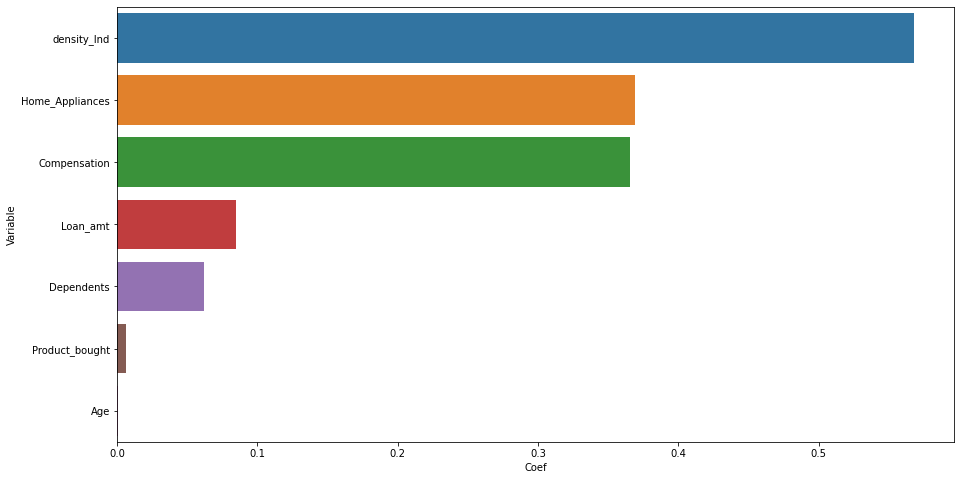

In [569]:
sns.barplot(feature_importances["Coef"], feature_importances["Variable"])
plt.show()

From the above bar plot we can say that those are features effecting for Loan default

- In that Density ind having highest Coef of 0.568 which means odds getting laon default is increased by 0.568 for one value of increase in Density ind

- In that Home_Appliances having second highest Coef of 0.369 which means odds getting laon default is increased by 0.369 for one value of increase in Home_Appliances

- In that Compensation having second highest Coef of 0.365 which means odds getting laon default is increased by 0.365 for one value of increase in Compensation

- In that Loan_amt having Third highest Coef of 0.085 which means odds getting laon default is increased by 0.085 for one value of increase in Loan_amt

- In that Dependents	having Fourth highest Coef of 0.062 which means odds getting laon default is increased by 0.062 for one value of increase in Dependents	

- In that Product_bought	having Fourth highest Coef of 0.0065 which means odds getting laon default is increased by 0.0065 for one value of increase in Product_bought

- In that Age	having Fourth highest Coef of 0.0009 which means odds getting laon default is increased by 0.0009 for one value of increase in Age

##### So finally can conclude that Density ind, number of Home_Appliances and Compensation are the major factors for Loan Default